<a href="https://colab.research.google.com/github/js5783/E4511-2021-Shen/blob/main/modelling_HPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install AMPL packages

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

# ! wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh 
# ! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
# ! time bash Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-06 18:00:22--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   154MB/s    in 3.4s    

2021-04-06 18:00:25 (147 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - an

In [3]:
!pip install mordred
!pip install --upgrade bravado
!pip install molvs

     |████████████████████████████████| 133kB 12.4MB/s 
  Created wheel for mordred: filename=mordred-1.2.0-cp37-none-any.whl size=176721 sha256=effae8378834b1889de934b153aa143a85093d21413ecdea4051d30b4a29743f
  Stored in directory: /root/.cache/pip/wheels/ac/74/3f/2fd81b1187013f2eadb15620434813f1824c4c03b7bd1f94f6
Successfully built mordred
     |████████████████████████████████| 133kB 12.1MB/s 
     |████████████████████████████████| 71kB 13.6MB/s 
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=7bc09ed5a6e6636c85ce66586cc4f2e1fcfcd49bc7efce4f1120a16bce1c67b5
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339
     |████████████████████████████████| 71kB 13.7MB/s 
  Created wheel for molvs: filename=MolVS-0.1.1-cp37-none-any.whl size=32376 sha256=f8ac0c3c388527085e24231bdfd46595a3924f5bd9652031c852a77f52d2ecd4
  Stored in directory: /root/.cache

In [4]:
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

--2021-04-06 18:08:06--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07K  --.-KB/s    in 0s      

2021-04-06 18:08:06 (33.1 MB/s) - ‘install_AMPL_GPU_test.sh’ saved [1100/1100]



In [5]:
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

Cloning into 'AMPL'...
remote: Enumerating objects: 389, done.
remote: Counting objects: 100% (389/389), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 1897 (delta 277), reused 232 (delta 166), pack-reused 1508
Receiving objects: 100% (1897/1897), 9.69 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (1089/1089), done.
Branch 'pkg_upgrade' set up to track remote branch 'pkg_upgrade' from 'origin'.
Switched to a new branch 'pkg_upgrade'
patching file /content/github/AMPL/atomsci/ddm/pipeline/transformations.py
patching file /content/github/AMPL/atomsci/ddm/__init__.py
running build
running build_py
creating /content/github/AMPL.build/ampl/lib
creating /content/github/AMPL.build/ampl/lib/atomsci
copying atomsci/__init__.py -> /content/github/AMPL.build/ampl/lib/atomsci
creating /content/github/AMPL.build/ampl/lib/atomsci/ddm
copying atomsci/ddm/__init__.py -> /content/github/AMPL.build/ampl/lib/atomsci/ddm
creating /content/github/AMPL.build/ampl/lib/atomsci/ddm/uti

In [6]:
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/H1_std.csv

--2021-04-06 18:08:11--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/H1_std.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136759 (134K) [text/plain]
Saving to: ‘H1_std.csv’

H1_std.csv          100%[===================>] 133.55K  --.-KB/s    in 0.01s   

2021-04-06 18:08:11 (12.9 MB/s) - ‘H1_std.csv’ saved [136759/136759]



In [7]:
!pip install hyperopt

     |████████████████████████████████| 972kB 14.6MB/s 


### Load packages and dataset

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle

from atomsci.ddm.pipeline import model_pipeline as mp
from atomsci.ddm.pipeline import parameter_parser as parse
from atomsci.ddm.pipeline import perf_data

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
h1 = pd.read_csv('/content/drive/MyDrive/Columbia_E4511/delaney_curated_final.csv')

In [58]:
h1.shape

(11292, 12)

In [59]:
h1

,compound_id,base_rdkit_smiles,relation,pXC50,active,rdkit_smiles,inchi_key,Compound_Id,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CHEMBL245412,C/C1=C\CC(C)(C)/C=C/C(=O)/C(C)=C/CC1,NaN,2.027809,0,C/C1=C\CC(C)(C)/C=C/C(=O)/C(C)=C/CC1,GIHNTRQPEMKFKO-SKTNYSRSSA-N,GIHNTRQPEMKFKO-SKTNYSRSSA-N,2.027809,NaN,0.0,0
1,CHEMBL1419469,Cc1ccccc1NC(=O)Cc1c(O)nc2ccccc2c1O,NaN,2.050000,0,Cc1ccccc1NC(=O)Cc1c(O)nc2ccccc2c1O,HYBPGKKEHPSNRR-UHFFFAOYSA-N,HYBPGKKEHPSNRR-UHFFFAOYSA-N,2.050000,NaN,0.0,0
2,CHEMBL1093607,CC(c1c(CCN(C)C)sc2ccccc12)n1ccnc1,NaN,2.097506,0,CC(c1c(CCN(C)C)sc2ccccc12)n1ccnc1,MSPFRPWEGPBFTC-UHFFFAOYSA-N,MSPFRPWEGPBFTC-UHFFFAOYSA-N,2.097506,NaN,0.0,0
3,CHEMBL66654,Cc1cccc(C#Cc2ccccc2)n1,NaN,2.233919,0,Cc1cccc(C#Cc2ccccc2)n1,NEWKHUASLBMWRE-UHFFFAOYSA-N,NEWKHUASLBMWRE-UHFFFAOYSA-N,2.233919,NaN,0.0,0
4,CHEMBL1091782,C[C@@H](c1cscn1)c1c(CCN(C)C)sc2ccccc12,NaN,2.308753,0,C[C@@H](c1cscn1)c1c(CCN(C)C)sc2ccccc12,GUNAZEDORZMWRN-LBPRGKRZSA-N,GUNAZEDORZMWRN-LBPRGKRZSA-N,2.308753,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11287,CHEMBL1089116,CCn1cc(-c2ccnc3[nH]ccc23)c(-c2ccc(NC(=O)Nc3ccc...,NaN,10.068432,1,CCn1cc(-c2ccnc3[nH]ccc23)c(-c2ccc(NC(=O)Nc3ccc...,CZVVMRNEBRFYTL-UHFFFAOYSA-N,CZVVMRNEBRFYTL-UHFFFAOYSA-N,10.068432,NaN,0.0,0
11288,CHEMBL1081870,Cc1cccc(C)c1CNc1nccc2c1nc(C)n2C,NaN,10.068432,1,Cc1cccc(C)c1CNc1nccc2c1nc(C)n2C,RFFMAFBDIYXZRC-UHFFFAOYSA-N,RFFMAFBDIYXZRC-UHFFFAOYSA-N,10.068432,NaN,0.0,0
11289,53392850,CN1C[C@H]2CCCC[C@@]2(Cc2ccc(Cl)c(Cl)c2)C1,NaN,10.369462,1,CN1C[C@H]2CCCC[C@@]2(Cc2ccc(Cl)c(Cl)c2)C1,CHWUQEOFMAPDHN-CZUORRHYSA-N,CHWUQEOFMAPDHN-CZUORRHYSA-N,10.369462,NaN,0.0,0
11290,53392852,Clc1ccc(C[C@@]23CCCC[C@@H]2CNC3)cc1Cl,NaN,10.369462,1,Clc1ccc(C[C@@]23CCCC[C@@H]2CNC3)cc1Cl,MEAWOAPXKTVYPU-IUODEOHRSA-N,MEAWOAPXKTVYPU-IUODEOHRSA-N,10.369462,NaN,0.0,0


### Split the dataset

In [64]:
train_file = '/content/drive/MyDrive/Columbia_E4511/delaney_curated_final.csv'
response_col = 'VALUE_NUM_mean'
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "split"
    }

ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-06 20:03:13,227 Splitting data by scaffold
2021-04-06 20:03:21,422 Dataset split table saved to /content/drive/MyDrive/Columbia_E4511/delaney_curated_final_train_valid_test_scaffold_206f1158-2b23-4f65-ad75-1139af914103.csv


### Train an initial model

In [67]:
listing = glob.glob(os.path.join("/", "content/drive/MyDrive/Columbia_E4511/delaney_curated_final_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output"
    }

In [68]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-06 20:06:11,783 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.469 s
Loading dataset from disk.
TIMING: dataset construction took 0.073 s
Loading dataset from disk.
TIMING: dataset construction took 0.055 s
Loading dataset from disk.


2021-04-06 20:06:43,533 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b29903eb-8358-40c0-ad92-d5679f802932/model_metadata.json
2021-04-06 20:06:47,732 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b29903eb-8358-40c0-ad92-d5679f802932/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b29903eb-8358-40c0-ad92-d5679f802932.tar.gz


In [69]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: -45.575


In [70]:
pred_data = pl.model_wrapper.get_perf_data(subset="full", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of test set: {pred_results['r2_score']:.3f}")

R2 score of test set: -34.273


### Train an model with uncertainty prediction

In [71]:
listing = glob.glob(os.path.join("/", "/content/drive/MyDrive/Columbia_E4511/delaney_curated_final_train_valid_test_scaffold_*"))
name = listing[0]
split_uuid = name.split("_")[-1].split(".")[0]
response_col = "VALUE_NUM_mean"

params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "prediction_type": "regression",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "split_uuid": split_uuid,
        "previously_split": "True",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": "ampl_output",
        "uncertainty": "True"
    }

In [72]:
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)
pl.train_model()

number of features: 1024


2021-04-06 20:10:04,845 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.469 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 20:10:35,657 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/aaf3bbdf-1ed2-45f5-b635-6515ee9cffd8/model_metadata.json
2021-04-06 20:10:39,416 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/aaf3bbdf-1ed2-45f5-b635-6515ee9cffd8/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_aaf3bbdf-1ed2-45f5-b635-6515ee9cffd8.tar.gz


In [73]:
pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
pred_results = pred_data.get_prediction_results()
print(f"R2 score of validation set: {pred_results['r2_score']:.3f}")

R2 score of validation set: -45.786


In [74]:
pred_df = pl.predict_on_dataframe(h1)
pred_df = pred_df.merge(h1[["rdkit_smiles", "VALUE_NUM_mean"]], on="rdkit_smiles")
pred_df = pred_df.assign(pred_error=pred_df.VALUE_NUM_mean-pred_df.pred)

2021-04-06 20:10:39,449 Featurizing data...
2021-04-06 20:11:45,853 Done


number of features: 1024
TIMING: dataset construction took 0.574 s
Loading dataset from disk.


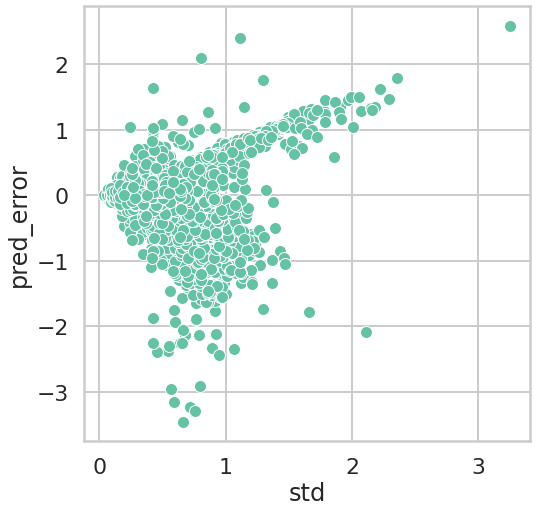

In [75]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(data=pred_df, x="std", y="pred_error", ax=ax)

### Grid search
#### Tunable parameters for Random Forest models
- rf_estimators: number of estimators to use in random forest models
- rf_max_depth: the maximum depth of a decision tree in the random forest
- rf_max_features: max number of features to split random forest nodes

In [76]:
param_choice = [16,32,64,128]

rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []
for rf_estimator in param_choice:
    for rf_depth in param_choice:
        for rf_feature in param_choice:
            params["rf_estimators"] = rf_estimator
            params["rf_max_depth"] = rf_depth
            params["rf_max_features"] = rf_feature
            rfe_list.append(rf_estimator)
            rfd_list.append(rf_depth)
            rff_list.append(rf_feature)
            tp = parse.wrapper(params)
            pl = mp.ModelPipeline(tp)
            pl.train_model()
            pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
            pred_results = pred_data.get_prediction_results()
            valid_r2 = pred_results['r2_score']
            valid_r2_list.append(valid_r2)
            print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

number of features: 1024


2021-04-06 20:15:03,042 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.473 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:15:06,783 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/020c7604-8699-4d8b-99f1-473a498fbff2/model_metadata.json
2021-04-06 20:15:06,813 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/020c7604-8699-4d8b-99f1-473a498fbff2/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_020c7604-8699-4d8b-99f1-473a498fbff2.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 16, valid_r2: -48.51602819735919
number of features: 1024


2021-04-06 20:16:19,025 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.488 s
Loading dataset from disk.
TIMING: dataset construction took 0.062 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:16:22,786 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0346d9e7-dc5b-4887-8bc0-c0baa82c6e26/model_metadata.json
2021-04-06 20:16:22,817 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0346d9e7-dc5b-4887-8bc0-c0baa82c6e26/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_0346d9e7-dc5b-4887-8bc0-c0baa82c6e26.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 32, valid_r2: -46.20365409134326
number of features: 1024


2021-04-06 20:17:36,322 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.479 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:17:40,520 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/959c9bcc-1c2b-407f-b851-773b5f3517a5/model_metadata.json
2021-04-06 20:17:40,550 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/959c9bcc-1c2b-407f-b851-773b5f3517a5/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_959c9bcc-1c2b-407f-b851-773b5f3517a5.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 64, valid_r2: -44.6512244324213
number of features: 1024


2021-04-06 20:18:52,342 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.478 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:18:56,957 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/17faafe0-6042-4a0a-a330-ac9ab4bf1c1c/model_metadata.json
2021-04-06 20:18:56,992 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/17faafe0-6042-4a0a-a330-ac9ab4bf1c1c/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_17faafe0-6042-4a0a-a330-ac9ab4bf1c1c.tar.gz
rf_estimators: 16, rf_max_depth: 16, rf_max_features: 128, valid_r2: -45.331710524396684
number of features: 1024


2021-04-06 20:20:10,584 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.491 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 20:20:14,507 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bc5197bd-bee7-45ac-b871-2c7fa7313d55/model_metadata.json
2021-04-06 20:20:14,589 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bc5197bd-bee7-45ac-b871-2c7fa7313d55/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_bc5197bd-bee7-45ac-b871-2c7fa7313d55.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 16, valid_r2: -48.01330246851466
number of features: 1024


2021-04-06 20:21:26,922 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.479 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 20:21:31,090 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1accd8b1-64a8-4602-8ca9-a7735bfaec61/model_metadata.json
2021-04-06 20:21:31,177 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1accd8b1-64a8-4602-8ca9-a7735bfaec61/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_1accd8b1-64a8-4602-8ca9-a7735bfaec61.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 32, valid_r2: -48.94340447423731
number of features: 1024


2021-04-06 20:22:41,459 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.478 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:22:45,954 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/34bd1dbe-399c-4ba0-b791-04ed0823a73a/model_metadata.json
2021-04-06 20:22:46,046 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/34bd1dbe-399c-4ba0-b791-04ed0823a73a/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_34bd1dbe-399c-4ba0-b791-04ed0823a73a.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 64, valid_r2: -46.28138619931483
number of features: 1024


2021-04-06 20:23:58,270 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.483 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 20:24:03,416 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/59f2429f-0c0f-447b-99fe-46dbe7619db3/model_metadata.json
2021-04-06 20:24:03,503 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/59f2429f-0c0f-447b-99fe-46dbe7619db3/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_59f2429f-0c0f-447b-99fe-46dbe7619db3.tar.gz
rf_estimators: 16, rf_max_depth: 32, rf_max_features: 128, valid_r2: -49.83382323342737
number of features: 1024


2021-04-06 20:25:15,126 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.367 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:25:19,113 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/da4870cf-5c42-467a-930f-897806d307f3/model_metadata.json
2021-04-06 20:25:19,251 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/da4870cf-5c42-467a-930f-897806d307f3/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_da4870cf-5c42-467a-930f-897806d307f3.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 16, valid_r2: -51.426359365450494
number of features: 1024


2021-04-06 20:26:32,984 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.491 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:26:37,378 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a124f0c9-64d0-4cce-bfc4-c8a29bc323fd/model_metadata.json
2021-04-06 20:26:37,515 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a124f0c9-64d0-4cce-bfc4-c8a29bc323fd/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a124f0c9-64d0-4cce-bfc4-c8a29bc323fd.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 32, valid_r2: -49.01462085447499
number of features: 1024


2021-04-06 20:27:52,050 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.


2021-04-06 20:27:56,928 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/eb1e3572-f1c6-490a-a18f-964ed3a19986/model_metadata.json
2021-04-06 20:27:57,059 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/eb1e3572-f1c6-490a-a18f-964ed3a19986/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_eb1e3572-f1c6-490a-a18f-964ed3a19986.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 64, valid_r2: -48.00681950554829
number of features: 1024


2021-04-06 20:29:11,639 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.441 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:29:17,006 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/51622de4-5feb-4809-9899-5f081c479420/model_metadata.json
2021-04-06 20:29:17,139 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/51622de4-5feb-4809-9899-5f081c479420/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_51622de4-5feb-4809-9899-5f081c479420.tar.gz
rf_estimators: 16, rf_max_depth: 64, rf_max_features: 128, valid_r2: -53.776153340269154
number of features: 1024


2021-04-06 20:30:31,470 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.452 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.


2021-04-06 20:30:35,753 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3efcf5f2-9a38-4b73-9694-bb69266005a8/model_metadata.json
2021-04-06 20:30:35,899 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3efcf5f2-9a38-4b73-9694-bb69266005a8/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_3efcf5f2-9a38-4b73-9694-bb69266005a8.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 16, valid_r2: -48.48201614733342
number of features: 1024


2021-04-06 20:31:48,149 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.484 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 20:31:52,331 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d50a5006-cf9d-4b04-aa01-b85cc8e2c79e/model_metadata.json
2021-04-06 20:31:52,472 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d50a5006-cf9d-4b04-aa01-b85cc8e2c79e/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_d50a5006-cf9d-4b04-aa01-b85cc8e2c79e.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 32, valid_r2: -51.41421704468205
number of features: 1024


2021-04-06 20:33:03,418 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.481 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:33:08,051 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0b70c4c3-9735-422d-a599-8b9048dc4006/model_metadata.json
2021-04-06 20:33:08,184 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0b70c4c3-9735-422d-a599-8b9048dc4006/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_0b70c4c3-9735-422d-a599-8b9048dc4006.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 64, valid_r2: -50.90140998195622
number of features: 1024


2021-04-06 20:34:14,032 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.435 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:34:19,404 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9ea40260-c237-4004-a2ab-d70a3ba4b4bc/model_metadata.json
2021-04-06 20:34:19,536 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9ea40260-c237-4004-a2ab-d70a3ba4b4bc/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9ea40260-c237-4004-a2ab-d70a3ba4b4bc.tar.gz
rf_estimators: 16, rf_max_depth: 128, rf_max_features: 128, valid_r2: -53.875384453946275
number of features: 1024


2021-04-06 20:35:28,514 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.348 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.


2021-04-06 20:35:32,081 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9ed4f51e-2386-46c5-97bc-28e01ae57263/model_metadata.json
2021-04-06 20:35:32,131 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9ed4f51e-2386-46c5-97bc-28e01ae57263/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9ed4f51e-2386-46c5-97bc-28e01ae57263.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 16, valid_r2: -46.62341875034013
number of features: 1024


2021-04-06 20:36:40,776 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.475 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 20:36:44,922 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1ab3a9b2-ad76-40fa-93e6-bf32f1bc0e08/model_metadata.json
2021-04-06 20:36:44,978 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1ab3a9b2-ad76-40fa-93e6-bf32f1bc0e08/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_1ab3a9b2-ad76-40fa-93e6-bf32f1bc0e08.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 32, valid_r2: -45.525501603214934
number of features: 1024


2021-04-06 20:37:54,496 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.356 s
Loading dataset from disk.
TIMING: dataset construction took 0.057 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:37:58,748 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/2840ca0d-e933-4d29-89b1-ec065f02f909/model_metadata.json
2021-04-06 20:37:58,805 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/2840ca0d-e933-4d29-89b1-ec065f02f909/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_2840ca0d-e933-4d29-89b1-ec065f02f909.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 64, valid_r2: -44.49006091850355
number of features: 1024


2021-04-06 20:39:08,501 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.482 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.


2021-04-06 20:39:13,947 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3509cc29-44d1-40d9-a107-077ba33d3c30/model_metadata.json
2021-04-06 20:39:14,004 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3509cc29-44d1-40d9-a107-077ba33d3c30/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_3509cc29-44d1-40d9-a107-077ba33d3c30.tar.gz
rf_estimators: 32, rf_max_depth: 16, rf_max_features: 128, valid_r2: -44.19675215810067
number of features: 1024


2021-04-06 20:40:24,375 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.471 s
Loading dataset from disk.
TIMING: dataset construction took 0.064 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:40:28,577 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/8d7ba2b9-dbe7-44f6-97f2-f40226e7d758/model_metadata.json
2021-04-06 20:40:28,737 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/8d7ba2b9-dbe7-44f6-97f2-f40226e7d758/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_8d7ba2b9-dbe7-44f6-97f2-f40226e7d758.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 16, valid_r2: -46.39488361523473
number of features: 1024


2021-04-06 20:41:37,294 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.484 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 20:41:42,019 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f6fc42e3-9d5e-4d31-ae21-e1417a8278a2/model_metadata.json
2021-04-06 20:41:42,190 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f6fc42e3-9d5e-4d31-ae21-e1417a8278a2/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f6fc42e3-9d5e-4d31-ae21-e1417a8278a2.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 32, valid_r2: -45.65898009534854
number of features: 1024


2021-04-06 20:42:56,151 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.443 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:43:01,425 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c9c21d58-7665-45a6-bcfa-a23e0f646cb6/model_metadata.json
2021-04-06 20:43:01,591 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c9c21d58-7665-45a6-bcfa-a23e0f646cb6/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_c9c21d58-7665-45a6-bcfa-a23e0f646cb6.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 64, valid_r2: -47.9323083519335
number of features: 1024


2021-04-06 20:44:15,374 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.465 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 20:44:21,659 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9323751f-0f88-4314-856c-6516410baf87/model_metadata.json
2021-04-06 20:44:21,822 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9323751f-0f88-4314-856c-6516410baf87/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9323751f-0f88-4314-856c-6516410baf87.tar.gz
rf_estimators: 32, rf_max_depth: 32, rf_max_features: 128, valid_r2: -47.33646936185128
number of features: 1024


2021-04-06 20:45:33,835 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.476 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 20:45:38,514 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/8759895c-4358-4ad3-a491-f06ffa8b0607/model_metadata.json
2021-04-06 20:45:38,785 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/8759895c-4358-4ad3-a491-f06ffa8b0607/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_8759895c-4358-4ad3-a491-f06ffa8b0607.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 16, valid_r2: -47.970474149526574
number of features: 1024


2021-04-06 20:46:49,849 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.473 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 20:46:54,889 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/04e5ed95-5113-4e60-96b7-c0d1f4cd8877/model_metadata.json
2021-04-06 20:46:55,161 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/04e5ed95-5113-4e60-96b7-c0d1f4cd8877/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_04e5ed95-5113-4e60-96b7-c0d1f4cd8877.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 32, valid_r2: -48.390074495904614
number of features: 1024


2021-04-06 20:48:09,620 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.481 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:48:15,412 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/cc7a81fb-0d1f-44ec-9050-ab3fa48f1775/model_metadata.json
2021-04-06 20:48:15,668 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/cc7a81fb-0d1f-44ec-9050-ab3fa48f1775/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_cc7a81fb-0d1f-44ec-9050-ab3fa48f1775.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 64, valid_r2: -48.001546397708665
number of features: 1024


2021-04-06 20:49:27,011 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.469 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.055 s
Loading dataset from disk.


2021-04-06 20:49:33,750 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/43c5d086-eeb1-46c9-86da-957795453f9b/model_metadata.json
2021-04-06 20:49:34,000 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/43c5d086-eeb1-46c9-86da-957795453f9b/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_43c5d086-eeb1-46c9-86da-957795453f9b.tar.gz
rf_estimators: 32, rf_max_depth: 64, rf_max_features: 128, valid_r2: -48.22727673515867
number of features: 1024


2021-04-06 20:50:40,540 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 20:50:45,148 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9987baf8-16a0-4fe1-986a-64f946a30679/model_metadata.json
2021-04-06 20:50:45,435 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9987baf8-16a0-4fe1-986a-64f946a30679/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9987baf8-16a0-4fe1-986a-64f946a30679.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 16, valid_r2: -47.77224662736042
number of features: 1024


2021-04-06 20:51:55,776 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.471 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 20:52:00,808 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/07f08589-ac05-4c57-be9e-c84fbffffb7f/model_metadata.json
2021-04-06 20:52:01,013 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/07f08589-ac05-4c57-be9e-c84fbffffb7f/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_07f08589-ac05-4c57-be9e-c84fbffffb7f.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 32, valid_r2: -48.47205891787225
number of features: 1024


2021-04-06 20:53:10,638 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.471 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:53:16,150 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/2032df89-b3bd-46dc-b643-83d95a5fe46e/model_metadata.json
2021-04-06 20:53:16,340 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/2032df89-b3bd-46dc-b643-83d95a5fe46e/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_2032df89-b3bd-46dc-b643-83d95a5fe46e.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 64, valid_r2: -47.6185680452436
number of features: 1024


2021-04-06 20:54:26,788 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 20:54:33,869 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5481e6cc-5e87-445a-ba87-85cd0dc9817f/model_metadata.json
2021-04-06 20:54:34,129 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5481e6cc-5e87-445a-ba87-85cd0dc9817f/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_5481e6cc-5e87-445a-ba87-85cd0dc9817f.tar.gz
rf_estimators: 32, rf_max_depth: 128, rf_max_features: 128, valid_r2: -50.17868406278316
number of features: 1024


2021-04-06 20:55:42,642 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.470 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 20:55:46,855 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3727268f-428f-43eb-a4c3-8e021d4110c1/model_metadata.json
2021-04-06 20:55:46,955 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3727268f-428f-43eb-a4c3-8e021d4110c1/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_3727268f-428f-43eb-a4c3-8e021d4110c1.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 16, valid_r2: -46.738123440097915
number of features: 1024


2021-04-06 20:57:01,016 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.476 s
Loading dataset from disk.
TIMING: dataset construction took 0.064 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 20:57:05,719 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b13e691e-cb4d-4149-9b71-bd54d731fad6/model_metadata.json
2021-04-06 20:57:05,825 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b13e691e-cb4d-4149-9b71-bd54d731fad6/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b13e691e-cb4d-4149-9b71-bd54d731fad6.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 32, valid_r2: -45.020186872919076
number of features: 1024


2021-04-06 20:58:15,881 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.396 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 20:58:21,359 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a5224665-aabe-4d6d-9609-90d8d153beef/model_metadata.json
2021-04-06 20:58:21,465 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a5224665-aabe-4d6d-9609-90d8d153beef/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a5224665-aabe-4d6d-9609-90d8d153beef.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 64, valid_r2: -43.25972079444533
number of features: 1024


2021-04-06 20:59:29,926 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.475 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 20:59:37,305 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/df7f9012-4335-4c51-b8df-6f39eef9f789/model_metadata.json
2021-04-06 20:59:37,407 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/df7f9012-4335-4c51-b8df-6f39eef9f789/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_df7f9012-4335-4c51-b8df-6f39eef9f789.tar.gz
rf_estimators: 64, rf_max_depth: 16, rf_max_features: 128, valid_r2: -44.01775195116196
number of features: 1024


2021-04-06 21:00:47,186 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.464 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:00:52,339 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/18f63c47-ae32-441f-9d22-e97bf787612e/model_metadata.json
2021-04-06 21:00:52,642 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/18f63c47-ae32-441f-9d22-e97bf787612e/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_18f63c47-ae32-441f-9d22-e97bf787612e.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 16, valid_r2: -46.64297964574098
number of features: 1024


2021-04-06 21:02:02,227 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.390 s
Loading dataset from disk.
TIMING: dataset construction took 0.063 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.


2021-04-06 21:02:07,583 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f2add239-9fd4-45dc-a4b9-c772eae30575/model_metadata.json
2021-04-06 21:02:07,909 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f2add239-9fd4-45dc-a4b9-c772eae30575/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f2add239-9fd4-45dc-a4b9-c772eae30575.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 32, valid_r2: -45.52577243987578
number of features: 1024


2021-04-06 21:03:18,107 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.471 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:03:24,929 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/dbab7082-b49c-4ce9-9be4-7e404cc0d4d9/model_metadata.json
2021-04-06 21:03:25,258 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/dbab7082-b49c-4ce9-9be4-7e404cc0d4d9/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_dbab7082-b49c-4ce9-9be4-7e404cc0d4d9.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 64, valid_r2: -45.49406768144577
number of features: 1024


2021-04-06 21:04:34,415 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.472 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:04:43,376 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/85533f96-17d7-425b-9961-b36b4696959a/model_metadata.json
2021-04-06 21:04:43,702 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/85533f96-17d7-425b-9961-b36b4696959a/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_85533f96-17d7-425b-9961-b36b4696959a.tar.gz
rf_estimators: 64, rf_max_depth: 32, rf_max_features: 128, valid_r2: -46.82823546966847
number of features: 1024


2021-04-06 21:05:51,718 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.354 s
Loading dataset from disk.
TIMING: dataset construction took 0.058 s
Loading dataset from disk.
TIMING: dataset construction took 0.058 s
Loading dataset from disk.


2021-04-06 21:05:57,139 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a77ef2d8-9bea-403e-8230-7456f61e29bc/model_metadata.json
2021-04-06 21:05:57,640 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a77ef2d8-9bea-403e-8230-7456f61e29bc/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a77ef2d8-9bea-403e-8230-7456f61e29bc.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 16, valid_r2: -46.52406090914003
number of features: 1024


2021-04-06 21:07:05,885 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.348 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 21:07:12,026 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5097066e-9b01-4fc3-85d8-a1b8db65c087/model_metadata.json
2021-04-06 21:07:12,550 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5097066e-9b01-4fc3-85d8-a1b8db65c087/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_5097066e-9b01-4fc3-85d8-a1b8db65c087.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 32, valid_r2: -47.26483719025349
number of features: 1024


2021-04-06 21:08:21,795 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.375 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 21:08:29,461 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ac6a4adc-b7e2-415a-bd86-4d726ad93bf4/model_metadata.json
2021-04-06 21:08:29,965 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ac6a4adc-b7e2-415a-bd86-4d726ad93bf4/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_ac6a4adc-b7e2-415a-bd86-4d726ad93bf4.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 64, valid_r2: -46.33725030201742
number of features: 1024


2021-04-06 21:09:39,798 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.475 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:09:49,906 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d1446eef-5565-4ba2-8041-da042799f35c/model_metadata.json
2021-04-06 21:09:50,334 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d1446eef-5565-4ba2-8041-da042799f35c/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_d1446eef-5565-4ba2-8041-da042799f35c.tar.gz
rf_estimators: 64, rf_max_depth: 64, rf_max_features: 128, valid_r2: -47.833103237098726
number of features: 1024


2021-04-06 21:10:59,294 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.476 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 21:11:04,802 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d86b3984-8a21-4b1b-b955-c849b22c1095/model_metadata.json
2021-04-06 21:11:05,364 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d86b3984-8a21-4b1b-b955-c849b22c1095/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_d86b3984-8a21-4b1b-b955-c849b22c1095.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 16, valid_r2: -47.124203837314504
number of features: 1024


2021-04-06 21:12:14,461 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.480 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.


2021-04-06 21:12:20,656 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/54c97af9-a237-44d6-824f-126903b694e1/model_metadata.json
2021-04-06 21:12:21,182 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/54c97af9-a237-44d6-824f-126903b694e1/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_54c97af9-a237-44d6-824f-126903b694e1.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 32, valid_r2: -48.95807404642783
number of features: 1024


2021-04-06 21:13:29,846 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.473 s
Loading dataset from disk.
TIMING: dataset construction took 0.055 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:13:37,548 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/21dad53d-6105-43d9-81a9-4e0599bad120/model_metadata.json
2021-04-06 21:13:38,073 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/21dad53d-6105-43d9-81a9-4e0599bad120/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_21dad53d-6105-43d9-81a9-4e0599bad120.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 64, valid_r2: -46.812020026314315
number of features: 1024


2021-04-06 21:14:46,155 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:14:56,620 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a58be35b-d2bb-4791-91fc-39f0a223188c/model_metadata.json
2021-04-06 21:14:57,137 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a58be35b-d2bb-4791-91fc-39f0a223188c/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a58be35b-d2bb-4791-91fc-39f0a223188c.tar.gz
rf_estimators: 64, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.57823498528429
number of features: 1024


2021-04-06 21:16:06,939 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.473 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:16:12,039 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9d8b4ea8-4a0b-44cd-b4de-286c0d7c9601/model_metadata.json
2021-04-06 21:16:12,216 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9d8b4ea8-4a0b-44cd-b4de-286c0d7c9601/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9d8b4ea8-4a0b-44cd-b4de-286c0d7c9601.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 16, valid_r2: -46.34553277957816
number of features: 1024


2021-04-06 21:17:20,554 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.472 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:17:26,410 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b44e4e81-7ce2-49df-9fee-a123e4108cf5/model_metadata.json
2021-04-06 21:17:26,612 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b44e4e81-7ce2-49df-9fee-a123e4108cf5/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b44e4e81-7ce2-49df-9fee-a123e4108cf5.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 32, valid_r2: -44.54939227909092
number of features: 1024


2021-04-06 21:18:36,117 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.378 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 21:18:43,452 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/45a12dde-50a3-4b2a-bcaa-aeec32e03741/model_metadata.json
2021-04-06 21:18:43,658 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/45a12dde-50a3-4b2a-bcaa-aeec32e03741/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_45a12dde-50a3-4b2a-bcaa-aeec32e03741.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 64, valid_r2: -44.23617527699837
number of features: 1024


2021-04-06 21:19:54,256 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.475 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.


2021-04-06 21:20:05,024 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/12c0f2cd-5381-469d-a4e4-905155bd0fb6/model_metadata.json
2021-04-06 21:20:05,229 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/12c0f2cd-5381-469d-a4e4-905155bd0fb6/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_12c0f2cd-5381-469d-a4e4-905155bd0fb6.tar.gz
rf_estimators: 128, rf_max_depth: 16, rf_max_features: 128, valid_r2: -43.337705817077754
number of features: 1024


2021-04-06 21:21:18,924 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.474 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:21:25,592 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/73263a8a-6b5a-47ad-b70b-d17380ebc9bf/model_metadata.json
2021-04-06 21:21:26,235 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/73263a8a-6b5a-47ad-b70b-d17380ebc9bf/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_73263a8a-6b5a-47ad-b70b-d17380ebc9bf.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 16, valid_r2: -45.32717173864889
number of features: 1024


2021-04-06 21:22:40,728 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.452 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 21:22:48,436 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7962444a-ee0a-4766-84af-bbc16fd54ebb/model_metadata.json
2021-04-06 21:22:49,092 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7962444a-ee0a-4766-84af-bbc16fd54ebb/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_7962444a-ee0a-4766-84af-bbc16fd54ebb.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 32, valid_r2: -44.912755229040165
number of features: 1024


2021-04-06 21:24:01,487 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.362 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.


2021-04-06 21:24:11,738 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f755b501-7d35-4db4-a37d-da2f481860d1/model_metadata.json
2021-04-06 21:24:12,376 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f755b501-7d35-4db4-a37d-da2f481860d1/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f755b501-7d35-4db4-a37d-da2f481860d1.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 64, valid_r2: -45.809686202870175
number of features: 1024


2021-04-06 21:25:27,399 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.482 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:25:42,108 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b8ad5146-fd08-4885-80ab-7d7e03885ef8/model_metadata.json
2021-04-06 21:25:42,725 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b8ad5146-fd08-4885-80ab-7d7e03885ef8/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b8ad5146-fd08-4885-80ab-7d7e03885ef8.tar.gz
rf_estimators: 128, rf_max_depth: 32, rf_max_features: 128, valid_r2: -45.67795223111961
number of features: 1024


2021-04-06 21:26:54,306 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.403 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 21:27:02,004 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a30ca10a-b9c6-4e47-a283-74ef1548808f/model_metadata.json
2021-04-06 21:27:02,905 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a30ca10a-b9c6-4e47-a283-74ef1548808f/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a30ca10a-b9c6-4e47-a283-74ef1548808f.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 16, valid_r2: -46.397092679244096
number of features: 1024


2021-04-06 21:28:14,230 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.481 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 21:28:23,669 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a511ac58-c7fa-4c86-bc1b-5a6d25165c7b/model_metadata.json
2021-04-06 21:28:24,702 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a511ac58-c7fa-4c86-bc1b-5a6d25165c7b/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a511ac58-c7fa-4c86-bc1b-5a6d25165c7b.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 32, valid_r2: -46.478672749902756
number of features: 1024


2021-04-06 21:29:34,450 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.380 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.072 s
Loading dataset from disk.


2021-04-06 21:29:46,059 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5709d619-f215-4e01-86cd-a2e7857bfb50/model_metadata.json
2021-04-06 21:29:47,073 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5709d619-f215-4e01-86cd-a2e7857bfb50/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_5709d619-f215-4e01-86cd-a2e7857bfb50.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 64, valid_r2: -46.86718350880285
number of features: 1024


2021-04-06 21:31:01,313 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.463 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:31:18,547 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9b347d21-e20a-4753-a469-fcbf1b23dd98/model_metadata.json
2021-04-06 21:31:19,503 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9b347d21-e20a-4753-a469-fcbf1b23dd98/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9b347d21-e20a-4753-a469-fcbf1b23dd98.tar.gz
rf_estimators: 128, rf_max_depth: 64, rf_max_features: 128, valid_r2: -47.008334454896385
number of features: 1024


2021-04-06 21:32:31,967 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.479 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.


2021-04-06 21:32:40,202 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/2c007122-dbfd-444b-8572-ce47556a9f0f/model_metadata.json
2021-04-06 21:32:41,297 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/2c007122-dbfd-444b-8572-ce47556a9f0f/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_2c007122-dbfd-444b-8572-ce47556a9f0f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 16, valid_r2: -46.698061841138355
number of features: 1024


2021-04-06 21:33:56,079 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.484 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:34:05,318 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d99175dd-f8c0-41af-afc8-8a46e3323bfc/model_metadata.json
2021-04-06 21:34:06,368 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d99175dd-f8c0-41af-afc8-8a46e3323bfc/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_d99175dd-f8c0-41af-afc8-8a46e3323bfc.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 32, valid_r2: -46.22164577536299
number of features: 1024


2021-04-06 21:35:21,016 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.461 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:35:33,093 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e60bf752-a62f-456a-b4df-967e679496c8/model_metadata.json
2021-04-06 21:35:34,130 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e60bf752-a62f-456a-b4df-967e679496c8/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_e60bf752-a62f-456a-b4df-967e679496c8.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 64, valid_r2: -46.387528048197034
number of features: 1024


2021-04-06 21:36:46,466 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.475 s
Loading dataset from disk.
TIMING: dataset construction took 0.072 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.


2021-04-06 21:37:04,048 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f0719025-8fe3-42ca-bc3f-9f0d188035df/model_metadata.json
2021-04-06 21:37:04,827 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f0719025-8fe3-42ca-bc3f-9f0d188035df/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f0719025-8fe3-42ca-bc3f-9f0d188035df.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -47.812637240241436


In [77]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
34,64,16,64,-43.259721
51,128,16,128,-43.337706
35,64,16,128,-44.017752
19,32,16,128,-44.196752
50,128,16,64,-44.236175
...,...,...,...,...
14,16,128,64,-50.901410
13,16,128,32,-51.414217
8,16,64,16,-51.426359
11,16,64,128,-53.776153


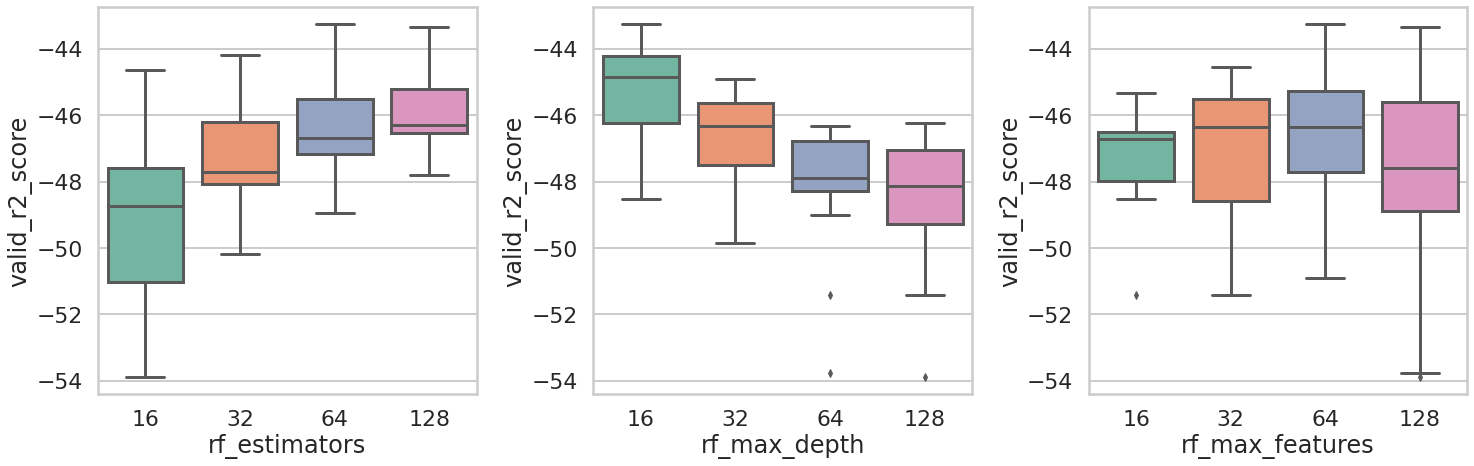

In [78]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.boxplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.boxplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.boxplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

### Random search

In [79]:
rfe_list = []
rfd_list = []
rff_list = []
valid_r2_list = []

num_trials = 50

for i in range(num_trials):
    params["rf_estimators"] = np.random.randint(8,256)
    params["rf_max_depth"] = np.random.randint(8,256)
    params["rf_max_features"] = np.random.randint(8,256)
    rfe_list.append(params["rf_estimators"])
    rfd_list.append(params["rf_max_depth"])
    rff_list.append(params["rf_max_features"])
    tp = parse.wrapper(params)
    pl = mp.ModelPipeline(tp)
    pl.train_model()
    pred_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
    pred_results = pred_data.get_prediction_results()
    valid_r2 = pred_results['r2_score']
    valid_r2_list.append(valid_r2)
    print(f"rf_estimators: {rf_estimator}, rf_max_depth: {rf_depth}, rf_max_features: {rf_feature}, valid_r2: {valid_r2}")

number of features: 1024


2021-04-06 21:38:16,717 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.467 s
Loading dataset from disk.
TIMING: dataset construction took 0.064 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:38:30,053 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0a53f661-87bf-4e6c-af77-acbd428564b6/model_metadata.json
2021-04-06 21:38:30,532 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0a53f661-87bf-4e6c-af77-acbd428564b6/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_0a53f661-87bf-4e6c-af77-acbd428564b6.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.039880396334674
number of features: 1024


2021-04-06 21:39:39,982 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.463 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 21:39:48,977 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/50fe90ee-2f78-41c1-ad00-4dcd04739af4/model_metadata.json
2021-04-06 21:39:49,337 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/50fe90ee-2f78-41c1-ad00-4dcd04739af4/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_50fe90ee-2f78-41c1-ad00-4dcd04739af4.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.723649774946765
number of features: 1024


2021-04-06 21:41:03,016 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.470 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 21:42:00,381 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9308be78-79cf-4432-9bdc-5e5a0e658e85/model_metadata.json
2021-04-06 21:42:02,118 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9308be78-79cf-4432-9bdc-5e5a0e658e85/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9308be78-79cf-4432-9bdc-5e5a0e658e85.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.330201472238166
number of features: 1024


2021-04-06 21:43:12,435 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.433 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:43:54,584 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/35231c23-c219-4324-b2c4-1e8fdb4cf6eb/model_metadata.json
2021-04-06 21:43:55,922 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/35231c23-c219-4324-b2c4-1e8fdb4cf6eb/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_35231c23-c219-4324-b2c4-1e8fdb4cf6eb.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -49.48618742043846
number of features: 1024


2021-04-06 21:45:09,673 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.460 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:45:20,346 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/66fa266c-e9a8-4c18-9463-9781201890ab/model_metadata.json
2021-04-06 21:45:21,049 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/66fa266c-e9a8-4c18-9463-9781201890ab/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_66fa266c-e9a8-4c18-9463-9781201890ab.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -47.10371580081879
number of features: 1024


2021-04-06 21:46:35,450 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.459 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:46:39,556 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/47ec0976-b8a9-4f1e-b164-178ae2585581/model_metadata.json
2021-04-06 21:46:39,576 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/47ec0976-b8a9-4f1e-b164-178ae2585581/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_47ec0976-b8a9-4f1e-b164-178ae2585581.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.227287040850236
number of features: 1024


2021-04-06 21:47:53,680 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.459 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:48:07,814 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/35faf5e6-f230-4269-bc07-a1ce54f02dd9/model_metadata.json
2021-04-06 21:48:08,542 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/35faf5e6-f230-4269-bc07-a1ce54f02dd9/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_35faf5e6-f230-4269-bc07-a1ce54f02dd9.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -47.494157306465596
number of features: 1024


2021-04-06 21:49:22,740 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.466 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.


2021-04-06 21:50:12,361 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f03e1837-b032-4972-ab63-69e862e2f473/model_metadata.json
2021-04-06 21:50:14,233 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f03e1837-b032-4972-ab63-69e862e2f473/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f03e1837-b032-4972-ab63-69e862e2f473.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.55923627213219
number of features: 1024


2021-04-06 21:51:29,245 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.474 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 21:52:10,590 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ddf87765-d00b-4fce-8fd3-52d836a89c13/model_metadata.json
2021-04-06 21:52:12,336 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ddf87765-d00b-4fce-8fd3-52d836a89c13/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_ddf87765-d00b-4fce-8fd3-52d836a89c13.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.1836121918266
number of features: 1024


2021-04-06 21:53:33,736 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.483 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.


2021-04-06 21:53:51,811 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/de8d58ee-45a8-4cc6-b213-464f228a6279/model_metadata.json
2021-04-06 21:53:52,230 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/de8d58ee-45a8-4cc6-b213-464f228a6279/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_de8d58ee-45a8-4cc6-b213-464f228a6279.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -43.62186925565711
number of features: 1024


2021-04-06 21:55:00,889 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.478 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 21:55:12,529 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/64623011-c5bf-4693-93cf-293ee6f18283/model_metadata.json
2021-04-06 21:55:14,354 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/64623011-c5bf-4693-93cf-293ee6f18283/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_64623011-c5bf-4693-93cf-293ee6f18283.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -46.71384724969387
number of features: 1024


2021-04-06 21:56:24,071 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.470 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 21:56:32,240 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d450d013-7a25-43ae-bf79-277778780866/model_metadata.json
2021-04-06 21:56:32,709 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d450d013-7a25-43ae-bf79-277778780866/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_d450d013-7a25-43ae-bf79-277778780866.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -44.84250408105866
number of features: 1024


2021-04-06 21:57:40,510 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.345 s
Loading dataset from disk.
TIMING: dataset construction took 0.048 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 21:57:50,964 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/8a0d4107-7348-415f-ab78-e40bd103a49d/model_metadata.json
2021-04-06 21:57:52,545 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/8a0d4107-7348-415f-ab78-e40bd103a49d/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_8a0d4107-7348-415f-ab78-e40bd103a49d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -46.360642094049766
number of features: 1024


2021-04-06 21:59:03,191 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.390 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 21:59:35,806 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e966a681-9a9f-4102-bb4c-4ead47fdcf36/model_metadata.json
2021-04-06 21:59:37,573 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e966a681-9a9f-4102-bb4c-4ead47fdcf36/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_e966a681-9a9f-4102-bb4c-4ead47fdcf36.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -47.07736198911932
number of features: 1024


2021-04-06 22:00:46,800 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.473 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 22:01:01,191 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bf36dbce-224a-4ec5-8718-c36c72a6ecd9/model_metadata.json
2021-04-06 22:01:01,592 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bf36dbce-224a-4ec5-8718-c36c72a6ecd9/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_bf36dbce-224a-4ec5-8718-c36c72a6ecd9.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.783941402417874
number of features: 1024


2021-04-06 22:02:12,118 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.450 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.


2021-04-06 22:02:23,571 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/06c836dd-77df-4b9e-a206-b3dd0663f9f2/model_metadata.json
2021-04-06 22:02:24,154 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/06c836dd-77df-4b9e-a206-b3dd0663f9f2/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_06c836dd-77df-4b9e-a206-b3dd0663f9f2.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -47.01964003227683
number of features: 1024


2021-04-06 22:03:34,582 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.348 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 22:03:51,827 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/231a3c59-3209-4e31-a248-5fc0e7db9bcb/model_metadata.json
2021-04-06 22:03:53,585 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/231a3c59-3209-4e31-a248-5fc0e7db9bcb/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_231a3c59-3209-4e31-a248-5fc0e7db9bcb.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.987014415044854
number of features: 1024


2021-04-06 22:05:00,745 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.378 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 22:05:13,363 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/25639095-73ed-44a0-924d-7d1ffe5d7a13/model_metadata.json
2021-04-06 22:05:14,718 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/25639095-73ed-44a0-924d-7d1ffe5d7a13/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_25639095-73ed-44a0-924d-7d1ffe5d7a13.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.876548109171424
number of features: 1024


2021-04-06 22:06:23,181 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.410 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 22:06:36,788 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6bfe7f18-af14-438c-845e-c3646c236720/model_metadata.json
2021-04-06 22:06:37,278 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6bfe7f18-af14-438c-845e-c3646c236720/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_6bfe7f18-af14-438c-845e-c3646c236720.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -43.63169894485255
number of features: 1024


2021-04-06 22:07:45,634 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.344 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.


2021-04-06 22:08:33,226 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/622f7620-ca11-49ae-9f26-115b40bef90d/model_metadata.json
2021-04-06 22:08:35,004 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/622f7620-ca11-49ae-9f26-115b40bef90d/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_622f7620-ca11-49ae-9f26-115b40bef90d.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.132881212768524
number of features: 1024


2021-04-06 22:09:43,871 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.465 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 22:10:02,171 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c0bcbd63-6f66-41df-9de1-bcf0f0a23351/model_metadata.json
2021-04-06 22:10:03,728 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c0bcbd63-6f66-41df-9de1-bcf0f0a23351/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_c0bcbd63-6f66-41df-9de1-bcf0f0a23351.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.59392545092105
number of features: 1024


2021-04-06 22:11:13,576 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.479 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.


2021-04-06 22:11:24,630 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/fcf3d719-1dc1-4f8d-8b7d-7ff1050eb666/model_metadata.json
2021-04-06 22:11:25,586 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/fcf3d719-1dc1-4f8d-8b7d-7ff1050eb666/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_fcf3d719-1dc1-4f8d-8b7d-7ff1050eb666.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.970960689918776
number of features: 1024


2021-04-06 22:12:35,251 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.484 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 22:12:46,797 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c1d78a3b-8f35-43ab-a862-7675eb3b3eba/model_metadata.json
2021-04-06 22:12:47,540 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c1d78a3b-8f35-43ab-a862-7675eb3b3eba/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_c1d78a3b-8f35-43ab-a862-7675eb3b3eba.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.0965623705853
number of features: 1024


2021-04-06 22:13:56,083 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.469 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:14:01,937 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0aab89d2-1262-40f7-9d02-cbddb04e136e/model_metadata.json
2021-04-06 22:14:01,996 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0aab89d2-1262-40f7-9d02-cbddb04e136e/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_0aab89d2-1262-40f7-9d02-cbddb04e136e.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -53.6832789162272
number of features: 1024


2021-04-06 22:15:12,823 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.398 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:15:36,929 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b06fee62-3afa-4520-8654-78e70657f9d9/model_metadata.json
2021-04-06 22:15:38,303 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b06fee62-3afa-4520-8654-78e70657f9d9/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b06fee62-3afa-4520-8654-78e70657f9d9.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -46.742338939208466
number of features: 1024


2021-04-06 22:16:46,513 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.064 s
Loading dataset from disk.
TIMING: dataset construction took 0.083 s
Loading dataset from disk.


2021-04-06 22:17:13,068 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/393922dd-5e45-41de-9576-951b56add521/model_metadata.json
2021-04-06 22:17:14,682 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/393922dd-5e45-41de-9576-951b56add521/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_393922dd-5e45-41de-9576-951b56add521.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -47.891394478087925
number of features: 1024


2021-04-06 22:18:23,654 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.480 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 22:18:44,774 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f2f1c0b5-d4e0-4d1e-9be5-b32f4d8b54ed/model_metadata.json
2021-04-06 22:18:45,553 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f2f1c0b5-d4e0-4d1e-9be5-b32f4d8b54ed/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f2f1c0b5-d4e0-4d1e-9be5-b32f4d8b54ed.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.58096460302834
number of features: 1024


2021-04-06 22:19:52,649 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.468 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 22:20:13,687 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/beaae223-3c64-4c54-bb15-2cb6f7a1cf18/model_metadata.json
2021-04-06 22:20:14,678 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/beaae223-3c64-4c54-bb15-2cb6f7a1cf18/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_beaae223-3c64-4c54-bb15-2cb6f7a1cf18.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -47.7211313512013
number of features: 1024


2021-04-06 22:21:25,982 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.468 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 22:21:33,034 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3cbd5545-b452-4d1e-8c50-dceb0513cb11/model_metadata.json
2021-04-06 22:21:33,174 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3cbd5545-b452-4d1e-8c50-dceb0513cb11/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_3cbd5545-b452-4d1e-8c50-dceb0513cb11.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -50.4476598331196
number of features: 1024


2021-04-06 22:22:41,517 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.438 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:23:00,569 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/99db974b-86c6-4fd3-afd9-220fd8244b57/model_metadata.json
2021-04-06 22:23:02,478 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/99db974b-86c6-4fd3-afd9-220fd8244b57/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_99db974b-86c6-4fd3-afd9-220fd8244b57.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.73274175589246
number of features: 1024


2021-04-06 22:24:12,107 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.466 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 22:24:33,056 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/19a09667-d5fe-4002-9c0f-0fd11d04bc46/model_metadata.json
2021-04-06 22:24:33,900 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/19a09667-d5fe-4002-9c0f-0fd11d04bc46/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_19a09667-d5fe-4002-9c0f-0fd11d04bc46.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.364992817362634
number of features: 1024


2021-04-06 22:25:43,214 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.429 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.


2021-04-06 22:25:50,683 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/913a0392-fd9e-4f9e-a3fc-afecd50d392f/model_metadata.json
2021-04-06 22:25:50,840 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/913a0392-fd9e-4f9e-a3fc-afecd50d392f/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_913a0392-fd9e-4f9e-a3fc-afecd50d392f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -43.77334750569215
number of features: 1024


2021-04-06 22:27:00,903 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.459 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:27:22,837 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ca743ce2-32e4-4c81-8c3a-a957fb79cf92/model_metadata.json
2021-04-06 22:27:23,281 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ca743ce2-32e4-4c81-8c3a-a957fb79cf92/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_ca743ce2-32e4-4c81-8c3a-a957fb79cf92.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -44.128758458120394
number of features: 1024


2021-04-06 22:28:33,422 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.468 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.


2021-04-06 22:28:56,935 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/52b5ab07-e4bb-49a0-bf09-60ad01afb98a/model_metadata.json
2021-04-06 22:28:59,054 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/52b5ab07-e4bb-49a0-bf09-60ad01afb98a/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_52b5ab07-e4bb-49a0-bf09-60ad01afb98a.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -46.01476525325198
number of features: 1024


2021-04-06 22:30:16,902 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.427 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 22:30:59,886 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f3ab11b2-d6bf-4590-8f57-d441e2550598/model_metadata.json
2021-04-06 22:31:01,439 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f3ab11b2-d6bf-4590-8f57-d441e2550598/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f3ab11b2-d6bf-4590-8f57-d441e2550598.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -49.04571831716853
number of features: 1024


2021-04-06 22:32:12,753 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.474 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.


2021-04-06 22:32:33,903 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a61fe281-9044-4533-b766-3b612ea59915/model_metadata.json
2021-04-06 22:32:35,323 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a61fe281-9044-4533-b766-3b612ea59915/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a61fe281-9044-4533-b766-3b612ea59915.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -46.14653386902199
number of features: 1024


2021-04-06 22:33:44,675 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.472 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.


2021-04-06 22:34:03,014 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6a9cc86e-1f40-45c0-8ecb-eb710beaf67c/model_metadata.json
2021-04-06 22:34:03,909 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6a9cc86e-1f40-45c0-8ecb-eb710beaf67c/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_6a9cc86e-1f40-45c0-8ecb-eb710beaf67c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.06760042550942
number of features: 1024


2021-04-06 22:35:11,727 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.382 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:35:17,194 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/00e9fc61-6960-4483-8354-bd1e000ab01c/model_metadata.json
2021-04-06 22:35:17,259 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/00e9fc61-6960-4483-8354-bd1e000ab01c/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_00e9fc61-6960-4483-8354-bd1e000ab01c.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -54.072362267227874
number of features: 1024


2021-04-06 22:36:28,495 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.362 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:36:35,584 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b2435d09-9a80-4001-b5a3-d7db1d6c9c5f/model_metadata.json
2021-04-06 22:36:35,725 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b2435d09-9a80-4001-b5a3-d7db1d6c9c5f/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b2435d09-9a80-4001-b5a3-d7db1d6c9c5f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -51.85235088367759
number of features: 1024


2021-04-06 22:37:46,611 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.460 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 22:37:50,439 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e1a96ce9-c427-46ad-b03b-c7f3584e5567/model_metadata.json
2021-04-06 22:37:50,507 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e1a96ce9-c427-46ad-b03b-c7f3584e5567/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_e1a96ce9-c427-46ad-b03b-c7f3584e5567.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -59.630130907797856
number of features: 1024


2021-04-06 22:39:00,027 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.478 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 22:39:07,707 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7a1e3057-78e8-4259-a251-b6b4b7a08fce/model_metadata.json
2021-04-06 22:39:07,894 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7a1e3057-78e8-4259-a251-b6b4b7a08fce/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_7a1e3057-78e8-4259-a251-b6b4b7a08fce.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -49.87762553563834
number of features: 1024


2021-04-06 22:40:17,697 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.463 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:40:25,284 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7d01c220-5ede-432b-ba92-e6a36052d40e/model_metadata.json
2021-04-06 22:40:25,409 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7d01c220-5ede-432b-ba92-e6a36052d40e/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_7d01c220-5ede-432b-ba92-e6a36052d40e.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -50.12021302449095
number of features: 1024


2021-04-06 22:41:35,317 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.480 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:41:50,957 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/dea1c06a-6aae-42b3-a3ac-ced2843cc72b/model_metadata.json
2021-04-06 22:41:52,656 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/dea1c06a-6aae-42b3-a3ac-ced2843cc72b/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_dea1c06a-6aae-42b3-a3ac-ced2843cc72b.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.712949632881596
number of features: 1024


2021-04-06 22:43:02,806 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.472 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.


2021-04-06 22:43:49,817 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e931a0b3-096a-45fe-b123-a2245f23737f/model_metadata.json
2021-04-06 22:43:51,482 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e931a0b3-096a-45fe-b123-a2245f23737f/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_e931a0b3-096a-45fe-b123-a2245f23737f.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.5263810672758
number of features: 1024


2021-04-06 22:45:01,153 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.360 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.


2021-04-06 22:45:11,336 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/671cd739-2818-42a2-a9cf-09eae235fa0a/model_metadata.json
2021-04-06 22:45:12,244 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/671cd739-2818-42a2-a9cf-09eae235fa0a/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_671cd739-2818-42a2-a9cf-09eae235fa0a.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.86232681227021
number of features: 1024


2021-04-06 22:46:21,501 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.433 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.


2021-04-06 22:46:32,594 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bb9d294d-9f9e-439f-8823-347bfda7b7d0/model_metadata.json
2021-04-06 22:46:33,883 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bb9d294d-9f9e-439f-8823-347bfda7b7d0/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_bb9d294d-9f9e-439f-8823-347bfda7b7d0.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -46.74418843645016
number of features: 1024


2021-04-06 22:47:43,468 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.472 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.


2021-04-06 22:47:50,607 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e615e593-0007-4639-953c-3c21a889e2d0/model_metadata.json
2021-04-06 22:47:50,625 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e615e593-0007-4639-953c-3c21a889e2d0/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_e615e593-0007-4639-953c-3c21a889e2d0.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -44.992661442585366
number of features: 1024


2021-04-06 22:49:01,386 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.476 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.062 s
Loading dataset from disk.


2021-04-06 22:49:10,943 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/cbe73770-718d-4fbd-bd4f-473ea58965b5/model_metadata.json
2021-04-06 22:49:11,232 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/cbe73770-718d-4fbd-bd4f-473ea58965b5/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_cbe73770-718d-4fbd-bd4f-473ea58965b5.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -49.97688511191713
number of features: 1024


2021-04-06 22:50:21,740 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.388 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.


2021-04-06 22:50:48,790 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/4e5215eb-1d1f-421c-8405-32ca0f6dba87/model_metadata.json
2021-04-06 22:50:49,751 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/4e5215eb-1d1f-421c-8405-32ca0f6dba87/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_4e5215eb-1d1f-421c-8405-32ca0f6dba87.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -48.641986616854595
number of features: 1024


2021-04-06 22:51:59,341 Previous dataset split restored


n_cnt [11292.]
y_means [5.16341151]
y_stds [0.84529703]
TIMING: dataset construction took 0.469 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.


2021-04-06 22:52:12,830 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ecb49dcc-9da5-410f-81f5-03b826ecf172/model_metadata.json
2021-04-06 22:52:13,933 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/ecb49dcc-9da5-410f-81f5-03b826ecf172/model_metrics.json


Wrote model tarball to ampl_output/delaney_curated_final_model_ecb49dcc-9da5-410f-81f5-03b826ecf172.tar.gz
rf_estimators: 128, rf_max_depth: 128, rf_max_features: 128, valid_r2: -45.82904033594186


In [80]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": valid_r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
9,202,18,114,-43.621869
18,247,18,60,-43.631699
31,96,16,72,-43.773348
32,176,20,174,-44.128758
11,119,26,41,-44.842504
46,39,9,248,-44.992661
22,149,32,56,-45.096562
20,195,103,66,-45.593925
42,207,196,40,-45.712950
29,236,224,52,-45.732742


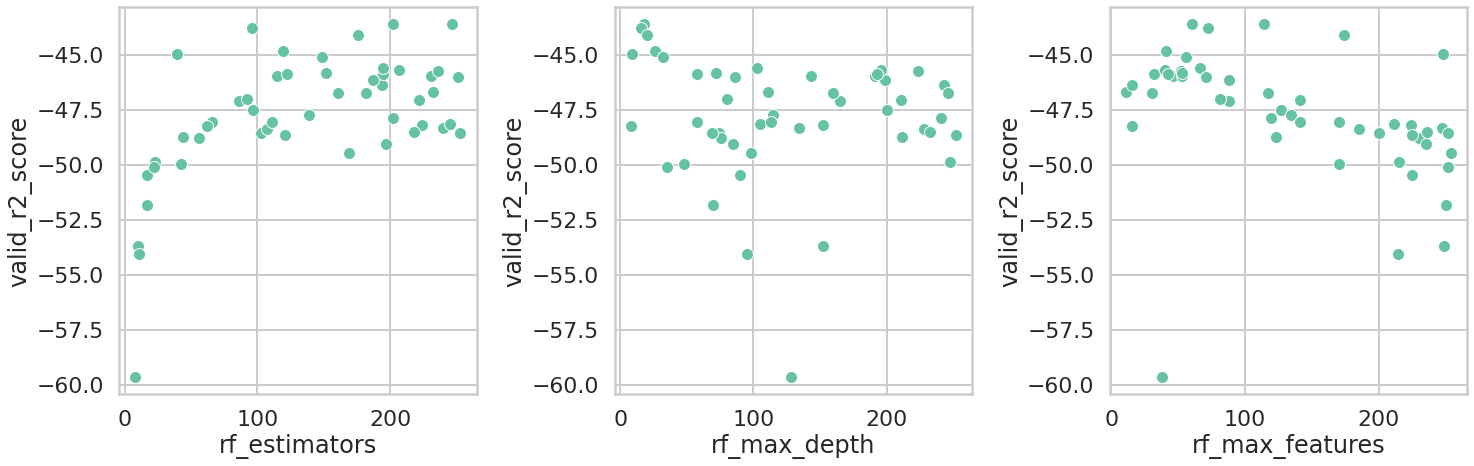

In [81]:
fig, ax = plt.subplots(1,3,figsize=(21,7))
sns.scatterplot(data=perf_df, x="rf_estimators", y="valid_r2_score", ax=ax[0])
sns.scatterplot(data=perf_df, x="rf_max_depth", y="valid_r2_score", ax=ax[1])
sns.scatterplot(data=perf_df, x="rf_max_features", y="valid_r2_score", ax=ax[2])
fig.tight_layout()

### Bayesian search

In [82]:
#define loss function
def lossfn(p):
    params["rf_estimators"] = int(p["rf_estimator"])
    params["rf_max_depth"] = int(p["rf_depth"])
    params["rf_max_features"] = int(p["rf_feature"])
    
    tparam = parse.wrapper(params)
    pl = mp.ModelPipeline(tparam)
    pl.train_model()
    perf_data = pl.model_wrapper.get_perf_data(subset="valid", epoch_label="best")
    pred_results = perf_data.get_prediction_results()
    r2 = pred_results['r2_score']
    return {'loss': 1-r2, 
            'status': STATUS_OK, 
            'model': tparam.model_tarball_path, 
            'rf_estimator': params["rf_estimators"],
            'rf_depth': params["rf_max_depth"],
            'rf_feature': params["rf_max_features"]}

space = {
    "rf_estimator": hp.uniform("rf_estimator", 8, 256),
    "rf_depth": hp.uniform("rf_depth", 8, 256),
    "rf_feature": hp.uniform("rf_feature", 8, 256)
}

In [83]:
trials = Trials()
best = fmin(lossfn, space, algo=tpe.suggest, max_evals=20, trials=trials)

number of features: 1024
  0%|          | 0/20 [01:06<?, ?it/s, best loss: ?]

2021-04-06 22:53:24,846 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.450 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
  0%|          | 0/20 [01:10<?, ?it/s, best loss: ?]

2021-04-06 22:53:50,610 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/83b058af-9848-4c4f-92a9-6cf34b083b5a/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_83b058af-9848-4c4f-92a9-6cf34b083b5a.tar.gz
  0%|          | 0/20 [01:36<?, ?it/s, best loss: ?]

2021-04-06 22:53:51,965 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/83b058af-9848-4c4f-92a9-6cf34b083b5a/model_metrics.json


number of features: 1024
  5%|▌         | 1/20 [02:43<30:37, 96.69s/it, best loss: 47.89046776730603]

2021-04-06 22:55:01,449 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.361 s
Loading dataset from disk.
TIMING: dataset construction took 0.056 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
  5%|▌         | 1/20 [02:47<30:37, 96.69s/it, best loss: 47.89046776730603]

2021-04-06 22:55:21,744 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c7eea40c-1492-43c6-95d3-fe169785d30f/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_c7eea40c-1492-43c6-95d3-fe169785d30f.tar.gz
  5%|▌         | 1/20 [03:07<30:37, 96.69s/it, best loss: 47.89046776730603]

2021-04-06 22:55:22,317 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c7eea40c-1492-43c6-95d3-fe169785d30f/model_metrics.json


number of features: 1024
 10%|█         | 2/20 [04:14<28:26, 94.79s/it, best loss: 44.758669643985996]

2021-04-06 22:56:32,892 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.473 s
Loading dataset from disk.
TIMING: dataset construction took 0.049 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 10%|█         | 2/20 [04:18<28:26, 94.79s/it, best loss: 44.758669643985996]

2021-04-06 22:57:05,191 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b4af572f-c05d-4112-b86c-d3347cd9616d/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b4af572f-c05d-4112-b86c-d3347cd9616d.tar.gz
 10%|█         | 2/20 [04:51<28:26, 94.79s/it, best loss: 44.758669643985996]

2021-04-06 22:57:06,675 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b4af572f-c05d-4112-b86c-d3347cd9616d/model_metrics.json


number of features: 1024
 15%|█▌        | 3/20 [05:58<27:40, 97.66s/it, best loss: 44.758669643985996]

2021-04-06 22:58:16,822 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.456 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 15%|█▌        | 3/20 [06:02<27:40, 97.66s/it, best loss: 44.758669643985996]

2021-04-06 22:58:30,652 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6284a531-18fa-474d-a2c6-347c6a61d7bc/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_6284a531-18fa-474d-a2c6-347c6a61d7bc.tar.gz
 15%|█▌        | 3/20 [06:15<27:40, 97.66s/it, best loss: 44.758669643985996]

2021-04-06 22:58:31,183 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6284a531-18fa-474d-a2c6-347c6a61d7bc/model_metrics.json


number of features: 1024
 20%|██        | 4/20 [07:21<24:59, 93.71s/it, best loss: 44.758669643985996]

2021-04-06 22:59:39,574 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.355 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 20%|██        | 4/20 [07:25<24:59, 93.71s/it, best loss: 44.758669643985996]

2021-04-06 23:00:06,699 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/563944d7-afaf-439b-90c5-1c9b84f108fa/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_563944d7-afaf-439b-90c5-1c9b84f108fa.tar.gz
 20%|██        | 4/20 [07:52<24:59, 93.71s/it, best loss: 44.758669643985996]

2021-04-06 23:00:07,869 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/563944d7-afaf-439b-90c5-1c9b84f108fa/model_metrics.json


number of features: 1024
 25%|██▌       | 5/20 [08:59<23:39, 94.61s/it, best loss: 44.758669643985996]

2021-04-06 23:01:17,519 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.472 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.061 s
Loading dataset from disk.
 25%|██▌       | 5/20 [09:03<23:39, 94.61s/it, best loss: 44.758669643985996]

2021-04-06 23:01:34,243 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3428dcdc-ce34-461d-97e2-e9342d62ff3d/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_3428dcdc-ce34-461d-97e2-e9342d62ff3d.tar.gz
 25%|██▌       | 5/20 [09:19<23:39, 94.61s/it, best loss: 44.758669643985996]

2021-04-06 23:01:34,688 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3428dcdc-ce34-461d-97e2-e9342d62ff3d/model_metrics.json


number of features: 1024
 30%|███       | 6/20 [10:26<21:31, 92.27s/it, best loss: 44.758669643985996]

2021-04-06 23:02:44,656 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.458 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.051 s
Loading dataset from disk.
 30%|███       | 6/20 [10:30<21:31, 92.27s/it, best loss: 44.758669643985996]

2021-04-06 23:03:02,428 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1e634942-70a7-42c7-b121-442faddf186a/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_1e634942-70a7-42c7-b121-442faddf186a.tar.gz
 30%|███       | 6/20 [10:47<21:31, 92.27s/it, best loss: 44.758669643985996]

2021-04-06 23:03:02,725 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1e634942-70a7-42c7-b121-442faddf186a/model_metrics.json


number of features: 1024
 35%|███▌      | 7/20 [11:53<19:43, 91.00s/it, best loss: 44.758669643985996]

2021-04-06 23:04:11,903 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.444 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
 35%|███▌      | 7/20 [11:57<19:43, 91.00s/it, best loss: 44.758669643985996]

2021-04-06 23:04:24,431 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/790862a2-d15a-4e01-864a-def044245ab9/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_790862a2-d15a-4e01-864a-def044245ab9.tar.gz
 35%|███▌      | 7/20 [12:10<19:43, 91.00s/it, best loss: 44.758669643985996]

2021-04-06 23:04:25,968 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/790862a2-d15a-4e01-864a-def044245ab9/model_metrics.json


number of features: 1024
 40%|████      | 8/20 [13:15<17:44, 88.67s/it, best loss: 44.758669643985996]

2021-04-06 23:05:33,799 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.391 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 40%|████      | 8/20 [13:19<17:44, 88.67s/it, best loss: 44.758669643985996]

2021-04-06 23:05:53,893 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3621890e-2af8-4575-9439-1eca596b848d/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_3621890e-2af8-4575-9439-1eca596b848d.tar.gz
 40%|████      | 8/20 [13:39<17:44, 88.67s/it, best loss: 44.758669643985996]

2021-04-06 23:05:54,894 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3621890e-2af8-4575-9439-1eca596b848d/model_metrics.json


number of features: 1024
 45%|████▌     | 9/20 [14:47<16:16, 88.75s/it, best loss: 44.758669643985996]

2021-04-06 23:07:05,755 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
 45%|████▌     | 9/20 [14:51<16:16, 88.75s/it, best loss: 44.758669643985996]

2021-04-06 23:07:16,261 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bc5521b8-4ea8-4016-ad78-47301df18f96/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_bc5521b8-4ea8-4016-ad78-47301df18f96.tar.gz
 45%|████▌     | 9/20 [15:01<16:16, 88.75s/it, best loss: 44.758669643985996]

2021-04-06 23:07:16,411 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/bc5521b8-4ea8-4016-ad78-47301df18f96/model_metrics.json


number of features: 1024
 50%|█████     | 10/20 [16:06<14:25, 86.58s/it, best loss: 44.60947385822959]

2021-04-06 23:08:24,940 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.429 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
 50%|█████     | 10/20 [16:10<14:25, 86.58s/it, best loss: 44.60947385822959]

2021-04-06 23:08:30,069 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/aea86f6f-5b38-44f2-8241-03ba4b9fda75/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_aea86f6f-5b38-44f2-8241-03ba4b9fda75.tar.gz
 50%|█████     | 10/20 [16:14<14:25, 86.58s/it, best loss: 44.60947385822959]

2021-04-06 23:08:30,201 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/aea86f6f-5b38-44f2-8241-03ba4b9fda75/model_metrics.json


number of features: 1024
 55%|█████▌    | 11/20 [17:20<12:24, 82.74s/it, best loss: 44.60947385822959]

2021-04-06 23:09:38,702 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.439 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 55%|█████▌    | 11/20 [17:24<12:24, 82.74s/it, best loss: 44.60947385822959]

2021-04-06 23:09:45,325 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b6a4e9e0-e254-478e-8d90-0acda423cfab/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b6a4e9e0-e254-478e-8d90-0acda423cfab.tar.gz
 55%|█████▌    | 11/20 [17:30<12:24, 82.74s/it, best loss: 44.60947385822959]

2021-04-06 23:09:45,557 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b6a4e9e0-e254-478e-8d90-0acda423cfab/model_metrics.json


number of features: 1024
 60%|██████    | 12/20 [18:36<10:44, 80.53s/it, best loss: 44.60947385822959]

2021-04-06 23:10:54,792 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.406 s
Loading dataset from disk.
TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
 60%|██████    | 12/20 [18:40<10:44, 80.53s/it, best loss: 44.60947385822959]

2021-04-06 23:11:45,463 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e7881964-e4d6-42cf-beff-e08d1b53f1ed/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_e7881964-e4d6-42cf-beff-e08d1b53f1ed.tar.gz
 60%|██████    | 12/20 [19:31<10:44, 80.53s/it, best loss: 44.60947385822959]

2021-04-06 23:11:47,158 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e7881964-e4d6-42cf-beff-e08d1b53f1ed/model_metrics.json


number of features: 1024
 65%|██████▌   | 13/20 [20:38<10:49, 92.85s/it, best loss: 44.60947385822959]

2021-04-06 23:12:57,102 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.415 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.072 s
Loading dataset from disk.
 65%|██████▌   | 13/20 [20:42<10:49, 92.85s/it, best loss: 44.60947385822959]

2021-04-06 23:13:10,021 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/741ca563-bbe8-4722-ade3-9b3e9df92f46/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_741ca563-bbe8-4722-ade3-9b3e9df92f46.tar.gz
 65%|██████▌   | 13/20 [20:55<10:49, 92.85s/it, best loss: 44.60947385822959]

2021-04-06 23:13:11,040 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/741ca563-bbe8-4722-ade3-9b3e9df92f46/model_metrics.json


number of features: 1024
 70%|███████   | 14/20 [22:02<09:00, 90.16s/it, best loss: 44.60947385822959]

2021-04-06 23:14:20,650 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.467 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
 70%|███████   | 14/20 [22:06<09:00, 90.16s/it, best loss: 44.60947385822959]

2021-04-06 23:15:00,327 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e43e4b05-a8af-4e1b-b61f-cec39d7397a0/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_e43e4b05-a8af-4e1b-b61f-cec39d7397a0.tar.gz
 70%|███████   | 14/20 [22:46<09:00, 90.16s/it, best loss: 44.60947385822959]

2021-04-06 23:15:01,491 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/e43e4b05-a8af-4e1b-b61f-cec39d7397a0/model_metrics.json


number of features: 1024
 75%|███████▌  | 15/20 [23:52<08:01, 96.25s/it, best loss: 44.60947385822959]

2021-04-06 23:16:10,980 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.465 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
 75%|███████▌  | 15/20 [23:56<08:01, 96.25s/it, best loss: 44.60947385822959]

2021-04-06 23:16:19,623 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1e24caae-c53e-4fba-b305-902558258429/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_1e24caae-c53e-4fba-b305-902558258429.tar.gz
 75%|███████▌  | 15/20 [24:04<08:01, 96.25s/it, best loss: 44.60947385822959]

2021-04-06 23:16:19,823 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1e24caae-c53e-4fba-b305-902558258429/model_metrics.json


number of features: 1024
 80%|████████  | 16/20 [25:12<06:03, 90.87s/it, best loss: 44.60947385822959]

2021-04-06 23:17:30,301 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.451 s
Loading dataset from disk.
TIMING: dataset construction took 0.054 s
Loading dataset from disk.
TIMING: dataset construction took 0.058 s
Loading dataset from disk.
 80%|████████  | 16/20 [25:16<06:03, 90.87s/it, best loss: 44.60947385822959]

2021-04-06 23:18:01,260 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/165cba07-ff89-403a-97f5-4c9a332e3b17/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_165cba07-ff89-403a-97f5-4c9a332e3b17.tar.gz
 80%|████████  | 16/20 [25:47<06:03, 90.87s/it, best loss: 44.60947385822959]

2021-04-06 23:18:02,837 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/165cba07-ff89-403a-97f5-4c9a332e3b17/model_metrics.json


number of features: 1024
 85%|████████▌ | 17/20 [26:52<04:43, 94.52s/it, best loss: 44.60947385822959]

2021-04-06 23:19:11,091 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.479 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
 85%|████████▌ | 17/20 [26:56<04:43, 94.52s/it, best loss: 44.60947385822959]

2021-04-06 23:19:30,088 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/762a7871-efe3-47e8-8342-20784ff9dbff/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_762a7871-efe3-47e8-8342-20784ff9dbff.tar.gz
 85%|████████▌ | 17/20 [27:15<04:43, 94.52s/it, best loss: 44.60947385822959]

2021-04-06 23:19:31,019 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/762a7871-efe3-47e8-8342-20784ff9dbff/model_metrics.json


number of features: 1024
 90%|█████████ | 18/20 [28:22<03:05, 92.61s/it, best loss: 44.60947385822959]

2021-04-06 23:20:41,171 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.470 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.072 s
Loading dataset from disk.
 90%|█████████ | 18/20 [28:27<03:05, 92.61s/it, best loss: 44.60947385822959]

2021-04-06 23:21:16,152 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0b803c6d-c299-4c1a-b590-35a5ce474181/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_0b803c6d-c299-4c1a-b590-35a5ce474181.tar.gz
 90%|█████████ | 18/20 [29:02<03:05, 92.61s/it, best loss: 44.60947385822959]

2021-04-06 23:21:17,601 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/0b803c6d-c299-4c1a-b590-35a5ce474181/model_metrics.json


number of features: 1024
 95%|█████████▌| 19/20 [30:10<01:36, 96.81s/it, best loss: 44.60947385822959]

2021-04-06 23:22:29,871 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.593 s
Loading dataset from disk.
TIMING: dataset construction took 0.099 s
Loading dataset from disk.
TIMING: dataset construction took 0.129 s
Loading dataset from disk.
 95%|█████████▌| 19/20 [30:16<01:36, 96.81s/it, best loss: 44.60947385822959]

2021-04-06 23:22:39,162 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c4bfa4a3-f27b-4f74-b7d7-22fa6cc92f0e/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_c4bfa4a3-f27b-4f74-b7d7-22fa6cc92f0e.tar.gz
 95%|█████████▌| 19/20 [30:24<01:36, 96.81s/it, best loss: 44.60947385822959]

2021-04-06 23:22:39,543 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c4bfa4a3-f27b-4f74-b7d7-22fa6cc92f0e/model_metrics.json


100%|██████████| 20/20 [30:24<00:00, 91.21s/it, best loss: 44.60947385822959]


(0.2, 0.6)

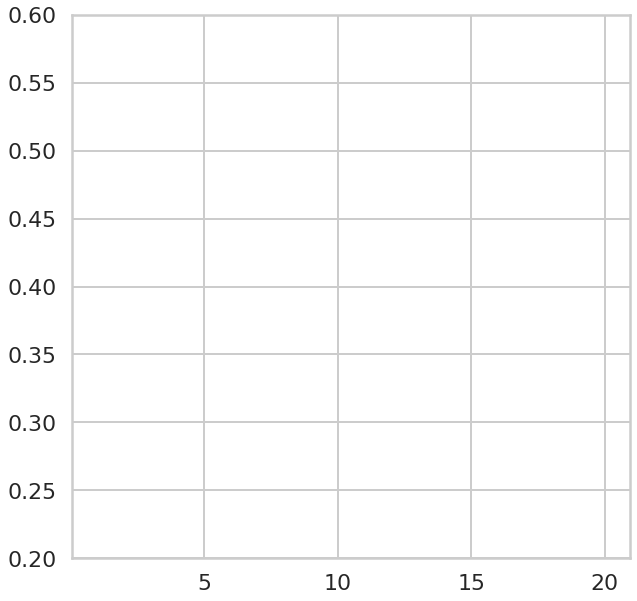

In [84]:
r2_list = [1-trials.trials[i]["result"]["loss"] for i in range(len(trials.trials))]
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.lineplot(x=list(range(1,len(trials.trials)+1)), y=r2_list, ax=ax)
ax.set_ylim(0.2,0.6)

In [85]:
rfe_list = [trials.trials[i]["result"]["rf_estimator"] for i in range(len(trials.trials))]
rfd_list = [trials.trials[i]["result"]["rf_depth"] for i in range(len(trials.trials))]
rff_list = [trials.trials[i]["result"]["rf_feature"] for i in range(len(trials.trials))]

In [86]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
9,100,15,131,-43.609474
1,191,22,134,-43.758670
6,144,20,161,-44.040470
13,157,209,46,-45.415008
7,209,131,24,-46.262057
19,50,81,48,-46.330948
16,224,62,134,-46.747230
0,189,204,123,-46.890468
2,209,92,152,-47.076587
18,198,77,184,-47.166097


#### Save Bayesian optimization trial object and continue later

In [87]:
# save the trial object
trial_file = os.path.join("hp_trial.pkl")
with open(trial_file, "wb") as f:
    pickle.dump(trials, f)

In [88]:
# load the trial object
with open(trial_file, "rb") as f:
    new_trials = pickle.load(f)

In [89]:
# continue HPO
best = fmin(lossfn, space, algo=tpe.suggest, max_evals=50, trials=new_trials)

number of features: 1024
  0%|          | 0/30 [01:07<?, ?it/s, best loss: ?]

2021-04-06 23:23:50,309 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.426 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
  0%|          | 0/30 [01:10<?, ?it/s, best loss: ?]

2021-04-06 23:23:58,157 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/18502331-0a1f-4072-92a3-2c2e248c6d82/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_18502331-0a1f-4072-92a3-2c2e248c6d82.tar.gz
  0%|          | 0/30 [01:17<?, ?it/s, best loss: ?]

2021-04-06 23:23:58,208 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/18502331-0a1f-4072-92a3-2c2e248c6d82/model_metrics.json


number of features: 1024
  3%|▎         | 1/30 [02:23<37:39, 77.91s/it, best loss: 44.60947385822959]

2021-04-06 23:25:06,705 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.475 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.076 s
Loading dataset from disk.
  3%|▎         | 1/30 [02:27<37:39, 77.91s/it, best loss: 44.60947385822959]

2021-04-06 23:25:28,906 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7dd43367-152b-4122-aeb0-21668aa98bb0/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_7dd43367-152b-4122-aeb0-21668aa98bb0.tar.gz
  3%|▎         | 1/30 [02:50<37:39, 77.91s/it, best loss: 44.60947385822959]

2021-04-06 23:25:30,378 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7dd43367-152b-4122-aeb0-21668aa98bb0/model_metrics.json


number of features: 1024
  7%|▋         | 2/30 [03:56<38:21, 82.19s/it, best loss: 44.60947385822959]

2021-04-06 23:26:40,024 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.072 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
  7%|▋         | 2/30 [04:00<38:21, 82.19s/it, best loss: 44.60947385822959]

2021-04-06 23:26:58,080 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/cbdb3df1-7999-40fd-9f97-017ae3f3f6f3/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_cbdb3df1-7999-40fd-9f97-017ae3f3f6f3.tar.gz
  7%|▋         | 2/30 [04:18<38:21, 82.19s/it, best loss: 44.60947385822959]

2021-04-06 23:26:58,554 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/cbdb3df1-7999-40fd-9f97-017ae3f3f6f3/model_metrics.json


number of features: 1024
 10%|█         | 3/30 [05:25<37:47, 83.98s/it, best loss: 44.60947385822959]

2021-04-06 23:28:08,860 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.388 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.064 s
Loading dataset from disk.
 10%|█         | 3/30 [05:29<37:47, 83.98s/it, best loss: 44.60947385822959]

2021-04-06 23:28:29,418 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/65b02ee1-9cc2-424c-bfc8-b3cd28b3aac3/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_65b02ee1-9cc2-424c-bfc8-b3cd28b3aac3.tar.gz
 10%|█         | 3/30 [05:50<37:47, 83.98s/it, best loss: 44.60947385822959]

2021-04-06 23:28:30,470 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/65b02ee1-9cc2-424c-bfc8-b3cd28b3aac3/model_metrics.json


number of features: 1024
 13%|█▎        | 4/30 [06:56<37:25, 86.36s/it, best loss: 44.60947385822959]

2021-04-06 23:29:39,428 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.478 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.072 s
Loading dataset from disk.
 13%|█▎        | 4/30 [07:00<37:25, 86.36s/it, best loss: 44.60947385822959]

2021-04-06 23:29:47,399 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9f13a7db-2097-42b1-b538-f31f78e1b503/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_9f13a7db-2097-42b1-b538-f31f78e1b503.tar.gz
 13%|█▎        | 4/30 [07:07<37:25, 86.36s/it, best loss: 44.60947385822959]

2021-04-06 23:29:47,475 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/9f13a7db-2097-42b1-b538-f31f78e1b503/model_metrics.json


number of features: 1024
 17%|█▋        | 5/30 [08:13<34:48, 83.56s/it, best loss: 44.60947385822959]

2021-04-06 23:30:56,792 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.375 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.073 s
Loading dataset from disk.
 17%|█▋        | 5/30 [08:17<34:48, 83.56s/it, best loss: 44.60947385822959]

2021-04-06 23:31:29,002 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6e0c0cda-6a34-49c4-a3b6-9166df3a2330/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_6e0c0cda-6a34-49c4-a3b6-9166df3a2330.tar.gz
 17%|█▋        | 5/30 [08:49<34:48, 83.56s/it, best loss: 44.60947385822959]

2021-04-06 23:31:30,247 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/6e0c0cda-6a34-49c4-a3b6-9166df3a2330/model_metrics.json


number of features: 1024
 20%|██        | 6/30 [09:54<35:43, 89.32s/it, best loss: 44.60947385822959]

2021-04-06 23:32:38,256 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.474 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.077 s
Loading dataset from disk.
 20%|██        | 6/30 [09:59<35:43, 89.32s/it, best loss: 44.60947385822959]

2021-04-06 23:32:47,481 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c49ceca2-d1e2-4589-a031-f1c9bdae7434/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_c49ceca2-d1e2-4589-a031-f1c9bdae7434.tar.gz
 20%|██        | 6/30 [10:07<35:43, 89.32s/it, best loss: 44.60947385822959]

2021-04-06 23:32:47,529 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/c49ceca2-d1e2-4589-a031-f1c9bdae7434/model_metrics.json


number of features: 1024
 23%|██▎       | 7/30 [11:13<32:51, 85.71s/it, best loss: 44.60947385822959]

2021-04-06 23:33:56,895 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.478 s
Loading dataset from disk.
TIMING: dataset construction took 0.058 s
Loading dataset from disk.
TIMING: dataset construction took 0.072 s
Loading dataset from disk.
 23%|██▎       | 7/30 [11:17<32:51, 85.71s/it, best loss: 44.60947385822959]

2021-04-06 23:34:12,043 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7235a3d1-de2f-41cd-8e73-03af9250dbd9/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_7235a3d1-de2f-41cd-8e73-03af9250dbd9.tar.gz
 23%|██▎       | 7/30 [11:32<32:51, 85.71s/it, best loss: 44.60947385822959]

2021-04-06 23:34:12,884 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7235a3d1-de2f-41cd-8e73-03af9250dbd9/model_metrics.json


number of features: 1024
 27%|██▋       | 8/30 [12:41<31:23, 85.60s/it, best loss: 44.60947385822959]

2021-04-06 23:35:24,536 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.434 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 27%|██▋       | 8/30 [12:45<31:23, 85.60s/it, best loss: 44.60947385822959]

2021-04-06 23:35:43,651 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a4abc71e-68f7-4edb-aed5-a9e73f5ea5ba/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a4abc71e-68f7-4edb-aed5-a9e73f5ea5ba.tar.gz
 27%|██▋       | 8/30 [13:04<31:23, 85.60s/it, best loss: 44.60947385822959]

2021-04-06 23:35:44,397 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a4abc71e-68f7-4edb-aed5-a9e73f5ea5ba/model_metrics.json


number of features: 1024
 30%|███       | 9/30 [14:15<30:34, 87.38s/it, best loss: 44.60947385822959]

2021-04-06 23:36:59,053 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.441 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
 30%|███       | 9/30 [14:19<30:34, 87.38s/it, best loss: 44.60947385822959]

2021-04-06 23:37:06,190 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a7dba264-475e-4cd9-9165-6dcef04c3341/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a7dba264-475e-4cd9-9165-6dcef04c3341.tar.gz
 30%|███       | 9/30 [14:26<30:34, 87.38s/it, best loss: 44.60947385822959]

2021-04-06 23:37:06,576 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a7dba264-475e-4cd9-9165-6dcef04c3341/model_metrics.json


number of features: 1024
 33%|███▎      | 10/30 [15:37<28:36, 85.82s/it, best loss: 44.60947385822959]

2021-04-06 23:38:20,976 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.477 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
 33%|███▎      | 10/30 [15:41<28:36, 85.82s/it, best loss: 44.60947385822959]

2021-04-06 23:38:54,991 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d888bdef-2587-4bbf-a049-596460e1db24/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_d888bdef-2587-4bbf-a049-596460e1db24.tar.gz
 33%|███▎      | 10/30 [16:16<28:36, 85.82s/it, best loss: 44.60947385822959]

2021-04-06 23:38:56,630 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/d888bdef-2587-4bbf-a049-596460e1db24/model_metrics.json


number of features: 1024
 37%|███▋      | 11/30 [17:28<29:28, 93.09s/it, best loss: 44.60947385822959]

2021-04-06 23:40:11,533 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.493 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
 37%|███▋      | 11/30 [17:32<29:28, 93.09s/it, best loss: 44.60947385822959]

2021-04-06 23:40:18,496 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/92823c16-90db-4e8e-9603-577135e70d07/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_92823c16-90db-4e8e-9603-577135e70d07.tar.gz
 37%|███▋      | 11/30 [17:38<29:28, 93.09s/it, best loss: 44.60947385822959]

2021-04-06 23:40:19,199 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/92823c16-90db-4e8e-9603-577135e70d07/model_metrics.json


number of features: 1024
 40%|████      | 12/30 [18:49<26:58, 89.93s/it, best loss: 44.60947385822959]

2021-04-06 23:41:33,363 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.513 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
 40%|████      | 12/30 [18:54<26:58, 89.93s/it, best loss: 44.60947385822959]

2021-04-06 23:42:10,882 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7e7daee7-f97b-413a-97bc-c54263ca88ae/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_7e7daee7-f97b-413a-97bc-c54263ca88ae.tar.gz
 40%|████      | 12/30 [19:32<26:58, 89.93s/it, best loss: 44.60947385822959]

2021-04-06 23:42:12,424 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/7e7daee7-f97b-413a-97bc-c54263ca88ae/model_metrics.json


number of features: 1024
 43%|████▎     | 13/30 [20:43<27:27, 96.92s/it, best loss: 44.60947385822959]

2021-04-06 23:43:26,499 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.488 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
TIMING: dataset construction took 0.074 s
Loading dataset from disk.
 43%|████▎     | 13/30 [20:47<27:27, 96.92s/it, best loss: 44.60947385822959]

2021-04-06 23:43:50,388 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a5f38715-8047-41ef-bd5f-cb2a49b1f469/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a5f38715-8047-41ef-bd5f-cb2a49b1f469.tar.gz
 43%|████▎     | 13/30 [21:11<27:27, 96.92s/it, best loss: 44.60947385822959]

2021-04-06 23:43:51,503 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a5f38715-8047-41ef-bd5f-cb2a49b1f469/model_metrics.json


number of features: 1024
 47%|████▋     | 14/30 [22:22<26:01, 97.57s/it, best loss: 44.60947385822959]

2021-04-06 23:45:06,062 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.483 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
 47%|████▋     | 14/30 [22:26<26:01, 97.57s/it, best loss: 44.60947385822959]

2021-04-06 23:45:18,279 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/fa22c019-7a32-4d36-8182-902e1e86fa05/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_fa22c019-7a32-4d36-8182-902e1e86fa05.tar.gz
 47%|████▋     | 14/30 [22:38<26:01, 97.57s/it, best loss: 44.60947385822959]

2021-04-06 23:45:18,875 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/fa22c019-7a32-4d36-8182-902e1e86fa05/model_metrics.json


number of features: 1024
 50%|█████     | 15/30 [23:49<23:37, 94.51s/it, best loss: 44.60947385822959]

2021-04-06 23:46:33,429 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.489 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 50%|█████     | 15/30 [23:54<23:37, 94.51s/it, best loss: 44.60947385822959]

2021-04-06 23:46:58,504 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/23ffaec0-0047-4e37-8646-18568a29ee18/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_23ffaec0-0047-4e37-8646-18568a29ee18.tar.gz
 50%|█████     | 15/30 [24:18<23:37, 94.51s/it, best loss: 44.60947385822959]

2021-04-06 23:46:59,255 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/23ffaec0-0047-4e37-8646-18568a29ee18/model_metrics.json


number of features: 1024
 53%|█████▎    | 16/30 [25:30<22:27, 96.27s/it, best loss: 44.60947385822959]

2021-04-06 23:48:13,619 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.471 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 53%|█████▎    | 16/30 [25:34<22:27, 96.27s/it, best loss: 44.60947385822959]

2021-04-06 23:48:58,618 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/07a5d11b-8ed1-4f12-b804-d864813550ab/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_07a5d11b-8ed1-4f12-b804-d864813550ab.tar.gz
 53%|█████▎    | 16/30 [26:19<22:27, 96.27s/it, best loss: 44.60947385822959]

2021-04-06 23:49:00,163 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/07a5d11b-8ed1-4f12-b804-d864813550ab/model_metrics.json


number of features: 1024
 57%|█████▋    | 17/30 [27:30<22:27, 103.66s/it, best loss: 44.60947385822959]

2021-04-06 23:50:14,331 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.482 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.053 s
Loading dataset from disk.
 57%|█████▋    | 17/30 [27:35<22:27, 103.66s/it, best loss: 44.60947385822959]

2021-04-06 23:50:42,530 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/fa3ab78e-9f1f-499e-a245-ffd2199f116c/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_fa3ab78e-9f1f-499e-a245-ffd2199f116c.tar.gz
 57%|█████▋    | 17/30 [28:04<22:27, 103.66s/it, best loss: 44.60947385822959]

2021-04-06 23:50:44,540 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/fa3ab78e-9f1f-499e-a245-ffd2199f116c/model_metrics.json


number of features: 1024
 60%|██████    | 18/30 [29:14<20:46, 103.88s/it, best loss: 44.60947385822959]

2021-04-06 23:51:58,191 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.439 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
 60%|██████    | 18/30 [29:18<20:46, 103.88s/it, best loss: 44.60947385822959]

2021-04-06 23:52:08,735 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1430376b-ed77-4738-83a7-4216b59649aa/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_1430376b-ed77-4738-83a7-4216b59649aa.tar.gz
 60%|██████    | 18/30 [29:29<20:46, 103.88s/it, best loss: 44.60947385822959]

2021-04-06 23:52:09,823 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1430376b-ed77-4738-83a7-4216b59649aa/model_metrics.json


number of features: 1024
 63%|██████▎   | 19/30 [30:40<18:01, 98.30s/it, best loss: 44.60947385822959]

2021-04-06 23:53:23,716 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.478 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
 63%|██████▎   | 19/30 [30:44<18:01, 98.30s/it, best loss: 44.60947385822959]

2021-04-06 23:53:34,497 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5dc3f3ae-85b8-468d-8e61-cdba4254be67/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_5dc3f3ae-85b8-468d-8e61-cdba4254be67.tar.gz
 63%|██████▎   | 19/30 [30:54<18:01, 98.30s/it, best loss: 44.60947385822959]

2021-04-06 23:53:34,656 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/5dc3f3ae-85b8-468d-8e61-cdba4254be67/model_metrics.json


number of features: 1024
 67%|██████▋   | 20/30 [32:06<15:42, 94.26s/it, best loss: 44.60947385822959]

2021-04-06 23:54:49,407 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.499 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.065 s
Loading dataset from disk.
 67%|██████▋   | 20/30 [32:10<15:42, 94.26s/it, best loss: 44.60947385822959]

2021-04-06 23:55:25,942 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/39494d1b-b8ec-4549-aa01-7f71054e6619/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_39494d1b-b8ec-4549-aa01-7f71054e6619.tar.gz
 67%|██████▋   | 20/30 [32:47<15:42, 94.26s/it, best loss: 44.60947385822959]

2021-04-06 23:55:27,649 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/39494d1b-b8ec-4549-aa01-7f71054e6619/model_metrics.json


number of features: 1024
 70%|███████   | 21/30 [33:57<14:58, 99.88s/it, best loss: 44.60947385822959]

2021-04-06 23:56:40,678 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.520 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
TIMING: dataset construction took 0.077 s
Loading dataset from disk.
 70%|███████   | 21/30 [34:01<14:58, 99.88s/it, best loss: 44.60947385822959]

2021-04-06 23:57:07,654 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1561f88d-a613-4769-9e58-929efe54643e/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_1561f88d-a613-4769-9e58-929efe54643e.tar.gz
 70%|███████   | 21/30 [34:28<14:58, 99.88s/it, best loss: 44.60947385822959]

2021-04-06 23:57:09,107 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/1561f88d-a613-4769-9e58-929efe54643e/model_metrics.json


number of features: 1024
 73%|███████▎  | 22/30 [35:40<13:22, 100.35s/it, best loss: 44.60947385822959]

2021-04-06 23:58:24,056 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.492 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.078 s
Loading dataset from disk.
 73%|███████▎  | 22/30 [35:44<13:22, 100.35s/it, best loss: 44.60947385822959]

2021-04-06 23:58:50,512 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f653291e-66c4-45d5-a936-7d08dae8e5cc/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_f653291e-66c4-45d5-a936-7d08dae8e5cc.tar.gz
 73%|███████▎  | 22/30 [36:11<13:22, 100.35s/it, best loss: 44.60947385822959]

2021-04-06 23:58:51,649 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/f653291e-66c4-45d5-a936-7d08dae8e5cc/model_metrics.json


number of features: 1024
 77%|███████▋  | 23/30 [37:22<11:47, 101.01s/it, best loss: 44.60947385822959]

2021-04-07 00:00:06,292 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.508 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 77%|███████▋  | 23/30 [37:27<11:47, 101.01s/it, best loss: 44.60947385822959]

2021-04-07 00:00:35,444 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/57d22aca-26f3-48db-a8d2-b9f873770b2a/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_57d22aca-26f3-48db-a8d2-b9f873770b2a.tar.gz
 77%|███████▋  | 23/30 [37:55<11:47, 101.01s/it, best loss: 44.60947385822959]

2021-04-07 00:00:36,289 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/57d22aca-26f3-48db-a8d2-b9f873770b2a/model_metrics.json


number of features: 1024
 80%|████████  | 24/30 [39:06<10:12, 102.10s/it, best loss: 44.60947385822959]

2021-04-07 00:01:50,311 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.450 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
 80%|████████  | 24/30 [39:11<10:12, 102.10s/it, best loss: 44.60947385822959]

2021-04-07 00:02:04,426 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/39d8d8d3-88e7-4ef1-ae48-9762851e3881/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_39d8d8d3-88e7-4ef1-ae48-9762851e3881.tar.gz
 80%|████████  | 24/30 [39:24<10:12, 102.10s/it, best loss: 44.60947385822959]

2021-04-07 00:02:05,312 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/39d8d8d3-88e7-4ef1-ae48-9762851e3881/model_metrics.json


number of features: 1024
 83%|████████▎ | 25/30 [40:36<08:10, 98.18s/it, best loss: 44.60947385822959]

2021-04-07 00:03:19,823 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.502 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.071 s
Loading dataset from disk.
 83%|████████▎ | 25/30 [40:40<08:10, 98.18s/it, best loss: 44.60947385822959]

2021-04-07 00:03:27,630 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/59f8886e-f3a1-48fa-a1da-fbbe847976a2/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_59f8886e-f3a1-48fa-a1da-fbbe847976a2.tar.gz
 83%|████████▎ | 25/30 [40:47<08:10, 98.18s/it, best loss: 44.60947385822959]

2021-04-07 00:03:27,936 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/59f8886e-f3a1-48fa-a1da-fbbe847976a2/model_metrics.json


number of features: 1024
 87%|████████▋ | 26/30 [42:08<06:14, 93.51s/it, best loss: 44.60947385822959]

2021-04-07 00:04:52,086 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.503 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
 87%|████████▋ | 26/30 [42:12<06:14, 93.51s/it, best loss: 44.60947385822959]

2021-04-07 00:05:04,611 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a4f396f9-d2fd-4380-9b2a-f39438539df6/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_a4f396f9-d2fd-4380-9b2a-f39438539df6.tar.gz
 87%|████████▋ | 26/30 [42:24<06:14, 93.51s/it, best loss: 44.60947385822959]

2021-04-07 00:05:05,190 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/a4f396f9-d2fd-4380-9b2a-f39438539df6/model_metrics.json


number of features: 1024
 90%|█████████ | 27/30 [43:36<04:43, 94.63s/it, best loss: 44.60947385822959]

2021-04-07 00:06:20,150 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.486 s
Loading dataset from disk.
TIMING: dataset construction took 0.050 s
Loading dataset from disk.
TIMING: dataset construction took 0.067 s
Loading dataset from disk.
 90%|█████████ | 27/30 [43:40<04:43, 94.63s/it, best loss: 44.60947385822959]

2021-04-07 00:06:32,102 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/78d97c83-6df0-4224-8626-4e41f8f18141/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_78d97c83-6df0-4224-8626-4e41f8f18141.tar.gz
 90%|█████████ | 27/30 [43:52<04:43, 94.63s/it, best loss: 44.60947385822959]

2021-04-07 00:06:32,840 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/78d97c83-6df0-4224-8626-4e41f8f18141/model_metrics.json


number of features: 1024
 93%|█████████▎| 28/30 [45:03<03:05, 92.54s/it, best loss: 44.60947385822959]

2021-04-07 00:07:47,023 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.495 s
Loading dataset from disk.
TIMING: dataset construction took 0.066 s
Loading dataset from disk.
TIMING: dataset construction took 0.069 s
Loading dataset from disk.
 93%|█████████▎| 28/30 [45:07<03:05, 92.54s/it, best loss: 44.60947385822959]

2021-04-07 00:07:51,950 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b1d856b0-f96f-4bc6-9c6a-d67fa723362d/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_b1d856b0-f96f-4bc6-9c6a-d67fa723362d.tar.gz
 93%|█████████▎| 28/30 [45:11<03:05, 92.54s/it, best loss: 44.60947385822959]

2021-04-07 00:07:52,058 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/b1d856b0-f96f-4bc6-9c6a-d67fa723362d/model_metrics.json


number of features: 1024
 97%|█████████▋| 29/30 [46:22<01:28, 88.54s/it, best loss: 44.60947385822959]

2021-04-07 00:09:05,981 Previous dataset split restored


n_cnt
[11292.]
y_means
[5.16341151]
y_stds
[0.84529703]
TIMING: dataset construction took 0.504 s
Loading dataset from disk.
TIMING: dataset construction took 0.068 s
Loading dataset from disk.
TIMING: dataset construction took 0.070 s
Loading dataset from disk.
 97%|█████████▋| 29/30 [46:26<01:28, 88.54s/it, best loss: 44.60947385822959]

2021-04-07 00:09:24,668 Wrote model metadata to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3b020115-4851-403c-9245-1b235e6ae01f/model_metadata.json


Wrote model tarball to ampl_output/delaney_curated_final_model_3b020115-4851-403c-9245-1b235e6ae01f.tar.gz
 97%|█████████▋| 29/30 [46:44<01:28, 88.54s/it, best loss: 44.60947385822959]

2021-04-07 00:09:25,055 Wrote model metrics to file ampl_output/delaney_curated_final/RF_ecfp_scaffold_regression/3b020115-4851-403c-9245-1b235e6ae01f/model_metrics.json


100%|██████████| 30/30 [46:44<00:00, 93.49s/it, best loss: 44.60947385822959]


(0.2, 0.6)

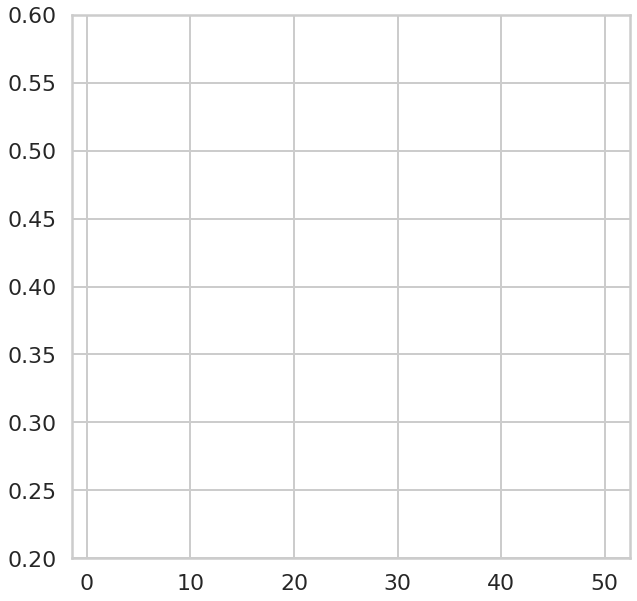

In [90]:
r2_list = [1-new_trials.trials[i]["result"]["loss"] for i in range(len(new_trials.trials))]
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.lineplot(x=list(range(1,len(new_trials.trials)+1)), y=r2_list, ax=ax)
ax.set_ylim(0.2,0.6)

In [91]:
rfe_list = [new_trials.trials[i]["result"]["rf_estimator"] for i in range(len(new_trials.trials))]
rfd_list = [new_trials.trials[i]["result"]["rf_depth"] for i in range(len(new_trials.trials))]
rff_list = [new_trials.trials[i]["result"]["rf_feature"] for i in range(len(new_trials.trials))]

In [92]:
perf_df = pd.DataFrame({"rf_estimators": rfe_list, "rf_max_depth": rfd_list, "rf_max_features": rff_list, "valid_r2_score": r2_list})
perf_df.sort_values(by="valid_r2_score", ascending=False)

,rf_estimators,rf_max_depth,rf_max_features,valid_r2_score
9,100,15,131,-43.609474
1,191,22,134,-43.758670
39,57,20,196,-43.918076
6,144,20,161,-44.040470
26,84,9,169,-44.187393
24,117,12,67,-44.599352
49,133,21,236,-44.772572
20,102,9,87,-44.915981
21,240,40,78,-44.979670
35,166,29,165,-45.305525
